In [74]:
# 1. Data Manipulation dan Umum
import numpy as np
import pandas as pd
from collections import Counter

# 2. Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Preprocessing dan Evaluasi Model
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    
)

# 4. Model Klasifikasi Scikit-learn
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 5. Model Gradient Boosting Tambahan
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

# 6. Penanganan Data Tidak Seimbang (Imbalanced-learn)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

# 7. Category Encoders
import category_encoders as ce

# Tambahan jika diperlukan
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV


# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score

In [2]:
df_read = pd.read_csv('../datasets/cleanedfix2.csv')

In [3]:
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12296 non-null  object
 1   Age_band_of_driver           12296 non-null  object
 2   Sex_of_driver                12296 non-null  object
 3   Vehicle_driver_relation      12296 non-null  object
 4   Driving_experience           12296 non-null  object
 5   Type_of_vehicle              12296 non-null  object
 6   Owner_of_vehicle             12296 non-null  object
 7   Area_accident_occured        12296 non-null  object
 8   Lanes_or_Medians             12296 non-null  object
 9   Road_allignment              12296 non-null  object
 10  Types_of_Junction            12296 non-null  object
 11  Road_surface_type            12296 non-null  object
 12  Road_surface_conditions      12296 non-null  object
 13  Light_conditions             12

In [4]:
df_read.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

In [5]:
df_read.iloc[0:5, 0:7]

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle
0,17:00:00,18-30,Male,Employee,1-2yr,Private Vehicle,Owner
1,17:00:00,31-50,Male,Employee,Above 10yr,Public Transport,Owner
2,17:00:00,18-30,Male,Employee,1-2yr,Commercial Vehicle,Owner
3,01:00:00,18-30,Male,Employee,5-10yr,Public Transport,Governmental
4,01:00:00,18-30,Male,Employee,2-5yr,Private Vehicle,Owner


In [6]:
df_read.iloc[0:5, 7:14]

,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions
0,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
1,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
2,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
3,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit
4,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit


In [7]:
df_read.iloc[0:5, 14:23]

,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,Normal,Stationary Object Collision,2,2,Moving forward,na,Moving Backward,Slight Injury,Monday
1,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Monday
2,Normal,Stationary Object Collision,2,2,Moving forward,3,Unsafe Lane Change,Serious Injury,Monday
3,Normal,Vehicle Collision,2,2,Moving forward,3,Unsafe Lane Change,Slight Injury,Sunday
4,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Sunday


buat mix 

    Time : KFOLD
    Age  : Label
    Sex_of_drive  : One hot
    vehicle driver realtion : One hot
    Driving expe : Label
    Type of vehicle : kfold target
    Owner of vehicle :  One hot
    Area accident occured : Kfold
    Lanes_or_Medians : Kfold
    Road_allignment : Kfold
    Types of Junction : Kfold
    Road_surface : Ohe
    Road_surface_conditions : ohe
    Light conditions : ohe
    Weather conditions : kfold
    Type of colision : Kfold
    Vehicle Movement : Kfold
    Casualty_severity : Kfold / Label (cek lebih lanjut)
    Cause of accident : Kfold
    Day : Ohe 





In [8]:
df_read.iloc[0:5, 14:23]

,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,Normal,Stationary Object Collision,2,2,Moving forward,na,Moving Backward,Slight Injury,Monday
1,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Monday
2,Normal,Stationary Object Collision,2,2,Moving forward,3,Unsafe Lane Change,Serious Injury,Monday
3,Normal,Vehicle Collision,2,2,Moving forward,3,Unsafe Lane Change,Slight Injury,Sunday
4,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Sunday


In [9]:
fitur_kategori = df_read.columns[df_read.dtypes == 'object'].tolist()
fitur_kategori

['Time',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_severity',
 'Cause_of_accident',
 'Accident_severity',
 'Day']

In [10]:
df_read['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10401
Serious Injury     1737
Fatal injury        158
Name: count, dtype: int64

In [11]:
df_read.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

# Encoding

In [12]:
le = LabelEncoder()
df_le = df_read.copy()

for nama_kategori in fitur_kategori:
    df_le[nama_kategori] = le.fit_transform(df_le[[nama_kategori]])


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: D

In [13]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12296 non-null  int64
 1   Age_band_of_driver           12296 non-null  int64
 2   Sex_of_driver                12296 non-null  int64
 3   Vehicle_driver_relation      12296 non-null  int64
 4   Driving_experience           12296 non-null  int64
 5   Type_of_vehicle              12296 non-null  int64
 6   Owner_of_vehicle             12296 non-null  int64
 7   Area_accident_occured        12296 non-null  int64
 8   Lanes_or_Medians             12296 non-null  int64
 9   Road_allignment              12296 non-null  int64
 10  Types_of_Junction            12296 non-null  int64
 11  Road_surface_type            12296 non-null  int64
 12  Road_surface_conditions      12296 non-null  int64
 13  Light_conditions             12296 non-null  i

In [14]:
df_read['Day'].head(20)

0        Monday
1        Monday
2        Monday
3        Sunday
4        Sunday
5        Friday
6     Wednesday
7        Friday
8        Friday
9        Friday
10     Saturday
11     Saturday
12     Thursday
13     Thursday
14     Thursday
15       Monday
16       Monday
17       Monday
18       Monday
19      Tuesday
Name: Day, dtype: object

In [ ]:
X = df_le.drop(columns=['Accident_severity'])
y = df_le['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train_ohe, "One-Hot Encoding")
score_le = evaluate_encoding(X_train, "Label Encoding")
# score_te = evaluate_encoding(X_train_te, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train_ohe, y_train).mean(),
    'Label Encoding': mutual_info_classif(X_train, y_train).mean(),
    # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:
Label Encoding: 0.8502

Mutual Information Scores:
Label Encoding: 0.0036


In [135]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.119695
Day                            0.079477
Cause_of_accident              0.074801
Area_accident_occured          0.069110
Driving_experience             0.063571
Lanes_or_Medians               0.060174
Age_band_of_driver             0.056483
Type_of_vehicle                0.054267
Number_of_vehicles_involved    0.049702
Vehicle_movement               0.047603
Types_of_Junction              0.047309
Number_of_casualties           0.043101
Type_of_collision              0.036602
Casualty_severity              0.035019
Road_allignment                0.030323
Light_conditions               0.024628
Weather_conditions             0.022407
Vehicle_driver_relation        0.021594
Road_surface_conditions        0.021015
Owner_of_vehicle               0.016867
Road_surface_type              0.014540
Sex_of_driver                  0.011712
dtype: float64


In [136]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

le_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
le_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

le_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
le_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

le_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
le_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

le_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
le_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

le_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
le_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", le_rf_f1_score, "Cross-Validation F1 Score:", le_rf_cv)
print("XGBoost F1 Score:", le_xgb_f1_score, "Cross-Validation F1 Score:", le_xgb_cv)
print("KNN F1 Score:", le_knn_f1_score, "Cross-Validation F1 Score:", le_knn_cv)
print("Logistic Regression F1 Score:", le_logreg_f1_score, "Cross-Validation F1 Score:", le_logreg_cv)
print("Extra Trees F1 Score:", le_extra_trees_f1_score, "Cross-Validation F1 Score:", le_extra_trees_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:58:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7807216971341048 Cross-Validation F1 Score: 0.7790864648315188
XGBoost F1 Score: 0.8082761541935287 Cross-Validation F1 Score: 0.7925469909841156
KNN F1 Score: 0.7785927838238814 Cross-Validation F1 Score: 0.7745539016771537
Logistic Regression F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees F1 Score: 0.7863597551237403 Cross-Validation F1 Score: 0.7836642684075337


In [137]:
df_le.isnull().sum()

Time                           0
Age_band_of_driver             0
Sex_of_driver                  0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
Day                            0
dtype: int64

# Ohe

In [17]:
df_ohe = df_read.copy()

le_target = LabelEncoder()
df_ohe['Accident_severity'] = le_target.fit_transform(df_ohe['Accident_severity'])

categorical_features = df_ohe.select_dtypes(include=['object','category']).columns.tolist()

ohe = OneHotEncoder(sparse_output=False) 
ohe_encoded = ohe.fit_transform(df_ohe[categorical_features])

ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(categorical_features))

df_ohe.drop(columns=categorical_features, inplace=True)
df_ohe = pd.concat([df_ohe, ohe_df], axis=1)

df_ohe.head()


,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_00:00:00,Time_01:00:00,Time_02:00:00,Time_03:00:00,Time_04:00:00,Time_05:00:00,Time_06:00:00,...,Cause_of_accident_Speeding,Cause_of_accident_Unknown,Cause_of_accident_Unsafe Lane Change,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
df_ohe.dropna(axis=0, inplace=True)

In [67]:
X_ohe = df_ohe.drop(columns=['Accident_severity'])
y_ohe = df_ohe['Accident_severity']

X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42, stratify=y_ohe)

In [35]:
# def evaluate_encoding(X_encoded, name):
#     score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
#     print(f"{name}: {score:.4f}")
#     return score

# print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# # score_le = evaluate_encoding(X_train, "Label Encoding")
# # score_te = evaluate_encoding(X_train_te, "Target Encoding")
# # score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

# print("\nMutual Information Scores:")
# mi_scores = {
#     'One-Hot': mutual_info_classif(X_train, y_train).mean(),
#     # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
#     # 'Target Encoding': mutual_info_classif(X_train_te, y_train).mean(),
#     # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
# }
# for key, value in mi_scores.items():
#     print(f"{key}: {value:.4f}")


In [36]:
# model = RandomForestClassifier().fit(X_train, y_train)
# feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
# print(feature_importance.sort_values(ascending=False))

In [37]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# ohe_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
# rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
# ohe_rf_cv = rf_cv_scores.mean()

# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# ohe_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
# xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
# ohe_xgb_cv = xgb_cv_scores.mean()

# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)
# knn_pred = knn_model.predict(X_test)

# ohe_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
# knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
# ohe_knn_cv = knn_cv_scores.mean()

# logreg_model = LogisticRegression(max_iter=1000, random_state=42)
# logreg_model.fit(X_train, y_train)
# logreg_pred = logreg_model.predict(X_test)

# ohe_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
# logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
# ohe_logreg_cv = logreg_cv_scores.mean()

# extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
# extra_trees_model.fit(X_train, y_train)
# extra_trees_pred = extra_trees_model.predict(X_test)

# ohe_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
# extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
# ohe_extra_trees_cv = extra_trees_cv_scores.mean()

# print("Random Forest F1 Score:", ohe_rf_f1_score, "Cross-Validation F1 Score:", ohe_rf_cv)
# print("XGBoost F1 Score:", ohe_xgb_f1_score, "Cross-Validation F1 Score:", ohe_xgb_cv)
# print("KNN F1 Score:", ohe_knn_f1_score, "Cross-Validation F1 Score:", ohe_knn_cv)
# print("Logistic Regression F1 Score:", ohe_logreg_f1_score, "Cross-Validation F1 Score:", ohe_logreg_cv)
# print("Extra Trees F1 Score:", ohe_extra_trees_f1_score, "Cross-Validation F1 Score:", ohe_extra_trees_cv)


# Target

In [38]:
df_target = df_read.copy()

if df_target['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_target['Accident_severity'] = le_target.fit_transform(df_target['Accident_severity'])

encoder = ce.TargetEncoder(cols=categorical_features,smoothing=0.5 ,min_samples_leaf=3)
df_target[categorical_features] = encoder.fit_transform(df_target[categorical_features], df_target['Accident_severity'])

df_target.head()


,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,1.857843,1.829972,1.831932,1.834806,1.846154,1.833100,1.831243,1.806796,1.830692,1.833097,...,1.841548,1.826914,1.823177,2,2,1.834306,1.840812,1.811785,2,1.864286
1,1.857843,1.841538,1.831932,1.834806,1.831490,1.830928,1.831243,1.839757,1.829294,1.833097,...,1.841548,1.826914,1.838120,2,2,1.834306,1.840812,1.796687,2,1.864286
2,1.857843,1.829972,1.831932,1.834806,1.846154,1.826220,1.831243,1.829268,1.829268,1.833097,...,1.841548,1.826914,1.823177,2,2,1.834306,1.826444,1.831912,1,1.864286
3,1.813433,1.829972,1.831932,1.834806,1.834768,1.830928,1.843420,1.839757,1.829268,1.838323,...,1.818293,1.826914,1.838120,2,2,1.834306,1.826444,1.831912,2,1.823329
4,1.813433,1.829972,1.831932,1.834806,1.819923,1.833100,1.831243,1.842105,1.829268,1.833097,...,1.818293,1.826914,1.838120,2,2,1.834306,1.840812,1.796687,2,1.823329


In [39]:
X = df_target.drop(columns=['Accident_severity'])
y = df_target['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
def evaluate_encoding(X_encoded, name):
    score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
    print(f"{name}: {score:.4f}")
    return score

print("Cross-Validation Scores:")
# score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# score_le = evaluate_encoding(X_train, "Label Encoding")
score_te = evaluate_encoding(X_train, "Target Encoding")
# score_freq = evaluate_encoding(X_train_freq, "Frequency Encoding")

print("\nMutual Information Scores:")
mi_scores = {
    # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
    # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
    'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
    # 'Frequency Encoding': mutual_info_classif(X_train_freq, y_train).mean()
}
for key, value in mi_scores.items():
    print(f"{key}: {value:.4f}")


Cross-Validation Scores:


KeyboardInterrupt: 

In [147]:
model = RandomForestClassifier().fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(feature_importance.sort_values(ascending=False))

Time                           0.111966
Day                            0.079783
Cause_of_accident              0.077259
Area_accident_occured          0.066539
Driving_experience             0.064127
Lanes_or_Medians               0.059084
Type_of_vehicle                0.056013
Age_band_of_driver             0.055336
Types_of_Junction              0.050964
Number_of_vehicles_involved    0.048983
Vehicle_movement               0.044090
Number_of_casualties           0.043403
Type_of_collision              0.039324
Casualty_severity              0.032309
Road_allignment                0.031640
Light_conditions               0.027821
Weather_conditions             0.023204
Vehicle_driver_relation        0.022643
Road_surface_conditions        0.021015
Owner_of_vehicle               0.018281
Road_surface_type              0.015172
Sex_of_driver                  0.011047
dtype: float64


In [148]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

target_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
target_rf_cv = rf_cv_scores.mean()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

target_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
target_xgb_cv = xgb_cv_scores.mean()

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

target_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
target_knn_cv = knn_cv_scores.mean()

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)

target_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
target_logreg_cv = logreg_cv_scores.mean()

extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_trees_model.fit(X_train, y_train)
extra_trees_pred = extra_trees_model.predict(X_test)

target_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
target_extra_trees_cv = extra_trees_cv_scores.mean()

print("Random Forest F1 Score:", target_rf_f1_score, "Cross-Validation F1 Score:", target_rf_cv)
print("XGBoost F1 Score:", target_xgb_f1_score, "Cross-Validation F1 Score:", target_xgb_cv)
print("KNN F1 Score:", target_knn_f1_score, "Cross-Validation F1 Score:", target_knn_cv)
print("Logistic Regression F1 Score:", target_logreg_f1_score, "Cross-Validation F1 Score:", target_logreg_cv)
print("Extra Trees F1 Score:", target_extra_trees_f1_score, "Cross-Validation F1 Score:", target_extra_trees_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:04:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:05:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7840172916795737 Cross-Validation F1 Score: 0.7798527841808898
XGBoost F1 Score: 0.8084595275303538 Cross-Validation F1 Score: 0.7908189065517094
KNN F1 Score: 0.8063594382734935 Cross-Validation F1 Score: 0.7886176582865867
Logistic Regression F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752608859289839
Extra Trees F1 Score: 0.7955326906115339 Cross-Validation F1 Score: 0.7877096303207196


In [149]:
# (0.8482142857142857,
#  0.849025974025974,
#  np.float64(0.8483270586498358),
#  np.float64(0.8403691847129728))

# KFOLD

In [41]:
from sklearn.model_selection import KFold

df_kfold = df_read.copy()

if df_kfold['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_kfold['Accident_severity'] = le_target.fit_transform(df_kfold['Accident_severity'])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

df_kfold_encoded = df_kfold.copy()

for col in categorical_features:
    df_kfold_encoded[col + '_kfold'] = 0
    
    for train_idx, val_idx in kf.split(df_kfold_encoded):
        encoder = ce.TargetEncoder(
            cols=[col],
            smoothing=1,
            min_samples_leaf=5
        )
        
        df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
        
        df_kfold_encoded.loc[val_idx, col + '_kfold'] = encoder.transform(df_kfold_encoded.loc[val_idx, [col]]).iloc[:, 0]
    
    df_kfold_encoded.drop(columns=[col], inplace=True)

df_kfold_encoded

df_kfold = df_kfold_encoded



/tmp/ipykernel_10539/681286498.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.85885886 1.85885886 1.83783784 ... 1.83094928 1.83307087 1.83307087]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
/tmp/ipykernel_10539/681286498.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.84835435 1.83074215 1.83074215 ... 1.87723577 1.80911901 1.83074215]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(df_kfold_encoded.loc[train_idx, [col]], df_kfold_encoded.loc[train_idx, 'Accident_severity']).iloc[:, 0]
/tmp/ipyke

In [42]:
df_kfold_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number_of_vehicles_involved    12296 non-null  int64  
 1   Number_of_casualties           12296 non-null  int64  
 2   Accident_severity              12296 non-null  int64  
 3   Time_kfold                     12296 non-null  float64
 4   Age_band_of_driver_kfold       12296 non-null  float64
 5   Sex_of_driver_kfold            12296 non-null  float64
 6   Vehicle_driver_relation_kfold  12296 non-null  float64
 7   Driving_experience_kfold       12296 non-null  float64
 8   Type_of_vehicle_kfold          12296 non-null  float64
 9   Owner_of_vehicle_kfold         12296 non-null  float64
 10  Area_accident_occured_kfold    12296 non-null  float64
 11  Lanes_or_Medians_kfold         12296 non-null  float64
 12  Road_allignment_kfold          12296 non-null 

In [ ]:
X_kfold = df_kfold.drop(columns=['Accident_severity'])
y_kfold = df_kfold['Accident_severity']

X_train_kfold, X_test_kfold, y_train_kfold, y_test_kfold = train_test_split(X_kfold, y_kfold, test_size=0.2, random_state=42, stratify=y_kfold)

In [ ]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# kfold_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
# rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
# kfold_rf_cv = rf_cv_scores.mean()

# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# kfold_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
# xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
# kfold_xgb_cv = xgb_cv_scores.mean()

# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)
# knn_pred = knn_model.predict(X_test)

# kfold_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
# knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
# kfold_knn_cv = knn_cv_scores.mean()

# logreg_model = LogisticRegression(max_iter=1000, random_state=42)
# logreg_model.fit(X_train, y_train)
# logreg_pred = logreg_model.predict(X_test)

# kfold_logreg_f1_score = f1_score(y_test, logreg_pred, average='weighted')
# logreg_cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='f1_weighted')
# kfold_logreg_cv = logreg_cv_scores.mean()

# extra_trees_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
# extra_trees_model.fit(X_train, y_train)
# extra_trees_pred = extra_trees_model.predict(X_test)

# kfold_extra_trees_f1_score = f1_score(y_test, extra_trees_pred, average='weighted')
# extra_trees_cv_scores = cross_val_score(extra_trees_model, X, y, cv=5, scoring='f1_weighted')
# kfold_extra_trees_cv = extra_trees_cv_scores.mean()

# print("Random Forest F1 Score:", kfold_rf_f1_score, "Cross-Validation F1 Score:", kfold_rf_cv)
# print("XGBoost F1 Score:", kfold_xgb_f1_score, "Cross-Validation F1 Score:", kfold_xgb_cv)
# print("KNN F1 Score:", kfold_knn_f1_score, "Cross-Validation F1 Score:", kfold_knn_cv)
# print("Logistic Regression F1 Score:", kfold_logreg_f1_score, "Cross-Validation F1 Score:", kfold_logreg_cv)
# print("Extra Trees F1 Score:", kfold_extra_trees_f1_score, "Cross-Validation F1 Score:", kfold_extra_trees_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:07:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:09:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:10:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:11:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7830669377072371 Cross-Validation F1 Score: 0.7810392958233188
XGBoost F1 Score: 0.8145729206414495 Cross-Validation F1 Score: 0.7932541174715917
KNN F1 Score: 0.8044929746155909 Cross-Validation F1 Score: 0.7889803758519741
Logistic Regression F1 Score: 0.7753317112558925 Cross-Validation F1 Score: 0.7752204936225919
Extra Trees F1 Score: 0.7998121747350422 Cross-Validation F1 Score: 0.789023896173527


In [ ]:
# def evaluate_encoding(X_encoded, name):
#     score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
#     print(f"{name}: {score:.4f}")
#     return score

# print("Cross-Validation Scores:")
# # score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# # score_le = evaluate_encoding(X_train, "Label Encoding")
# # score_te = evaluate_encoding(X_train, "Target Encoding")
# score_freq = evaluate_encoding(X_train, "Kfold Target Encoding")

# print("\nMutual Information Scores:")
# mi_scores = {
#     # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
#     # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
#     # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
#     'Kfold Target Encoding': mutual_info_classif(X_train, y_train).mean()
# }
# for key, value in mi_scores.items():
#     print(f"{key}: {value:.4f}")


Cross-Validation Scores:
Kfold Target Encoding: 0.8505

Mutual Information Scores:
Kfold Target Encoding: 0.0029


In [ ]:
# model = RandomForestClassifier().fit(X_train, y_train)
# feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
# print(feature_importance.sort_values(ascending=False))

Time_kfold                       0.111776
Day_kfold                        0.080198
Cause_of_accident_kfold          0.075415
Area_accident_occured_kfold      0.066020
Driving_experience_kfold         0.065462
Lanes_or_Medians_kfold           0.061350
Type_of_vehicle_kfold            0.055308
Age_band_of_driver_kfold         0.054485
Types_of_Junction_kfold          0.050800
Number_of_vehicles_involved      0.047774
Vehicle_movement_kfold           0.044279
Number_of_casualties             0.042810
Type_of_collision_kfold          0.039394
Casualty_severity_kfold          0.035179
Road_allignment_kfold            0.030248
Light_conditions_kfold           0.027698
Weather_conditions_kfold         0.023863
Vehicle_driver_relation_kfold    0.022621
Road_surface_conditions_kfold    0.020570
Owner_of_vehicle_kfold           0.017593
Road_surface_type_kfold          0.015731
Sex_of_driver_kfold              0.011428
dtype: float64


# Catboost Encoder

In [ ]:
# from sklearn.model_selection import KFold
# # from categorical_encoding import CatBoostEncoder
# #
# df_catboost = df_read.copy()

# if df_catboost['Accident_severity'].dtype == 'object':
#     le_target = LabelEncoder()
#     df_catboost['Accident_severity'] = le_target.fit_transform(df_catboost['Accident_severity'])

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# df_catboost_encoded = df_catboost.copy()

# for col in categorical_features:
#     df_catboost_encoded[col + '_kfold'] = 0
    
#     for train_idx, val_idx in kf.split(df_catboost_encoded):
#         encoder = ce.CatBoostEncoder(
#             cols=[col],
#             # min_samples_leaf=5
#         )
        
#         train_data = df_catboost_encoded.loc[train_idx, [col]]
#         train_target = df_catboost_encoded.loc[train_idx, 'Accident_severity']
#         val_data = df_catboost_encoded.loc[val_idx, [col]]
        
#         df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
#         df_catboost_encoded.loc[val_idx, col + '_kfold'] = encoder.transform(val_data).iloc[:, 0]
    
#     df_catboost_encoded.drop(columns=[col], inplace=True)

# df_catboost_encoded

# df_catboost = df_catboost_encoded


/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83407889 1.91703945 1.83407889 ... 1.83073352 1.83412315 1.83280957]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83407889 1.83407889 1.41703945 ... 1.87710088 1.80976358 1.83069348]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_catboost_encoded.loc[train_idx, col + '_kfold'] = encoder.fit_transform(train_data, train_target).iloc[:, 0]
/tmp/ipykernel_27360/1222382230.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will r

In [ ]:
# target = df_catboost[['Accident_severity']]
# train = df_catboost.drop('Accident_severity', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

# # Random Forest Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# catboost_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
# rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1_weighted')
# catboost_rf_cv = rf_cv_scores.mean()

# # XGBoost Model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# catboost_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
# xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='f1_weighted')
# catboost_xgb_cv = xgb_cv_scores.mean()

# # KNeighborsClassifier Model
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)
# knn_pred = knn_model.predict(X_test)

# catboost_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
# knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='f1_weighted')
# catboost_knn_cv = knn_cv_scores.mean()

# # ExtraTrees Classifier Model
# et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# et_model.fit(X_train, y_train)
# et_pred = et_model.predict(X_test)

# catboost_et_f1_score = f1_score(y_test, et_pred, average='weighted')
# et_cv_scores = cross_val_score(et_model, X_train, y_train, cv=5, scoring='f1_weighted')
# catboost_et_cv = et_cv_scores.mean()

# # Logistic Regression Model
# lr_model = LogisticRegression(max_iter=1000, random_state=42)
# lr_model.fit(X_train, y_train)
# lr_pred = lr_model.predict(X_test)

# catboost_lr_f1_score = f1_score(y_test, lr_pred, average='weighted')
# lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1_weighted')
# catboost_lr_cv = lr_cv_scores.mean()

# # Print results for all models
# print("Random Forest F1 Score:", catboost_rf_f1_score, "Cross-Validation F1 Score:", catboost_rf_cv)
# print("XGBoost F1 Score:", catboost_xgb_f1_score, "Cross-Validation F1 Score:", catboost_xgb_cv)
# print("KNN F1 Score:", catboost_knn_f1_score, "Cross-Validation F1 Score:", catboost_knn_cv)
# print("Extra Trees F1 Score:", catboost_et_f1_score, "Cross-Validation F1 Score:", catboost_et_cv)
# print("Logistic Regression F1 Score:", catboost_lr_f1_score, "Cross-Validation F1 Score:", catboost_lr_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  def is_regressor(estimator):
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array wa

Random Forest F1 Score: 0.7837050566670106 Cross-Validation F1 Score: 0.7762483957886094
XGBoost F1 Score: 0.7994492983141027 Cross-Validation F1 Score: 0.7916908332680779
KNN F1 Score: 0.8033124187300207 Cross-Validation F1 Score: 0.7964422339676841
Extra Trees F1 Score: 0.8048530018871873 Cross-Validation F1 Score: 0.7879567637288828
Logistic Regression F1 Score: 0.7774942011420207 Cross-Validation F1 Score: 0.7748557650349391


In [158]:
print(type(y_train))  # Should show <class 'pandas.core.series.Series'>
print(type(y_test))   # Should show <class 'pandas.core.series.Series'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [159]:
print(type(X_train))  # Should be <class 'pandas.core.frame.DataFrame'>
print(type(y_train))  # Should be <class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


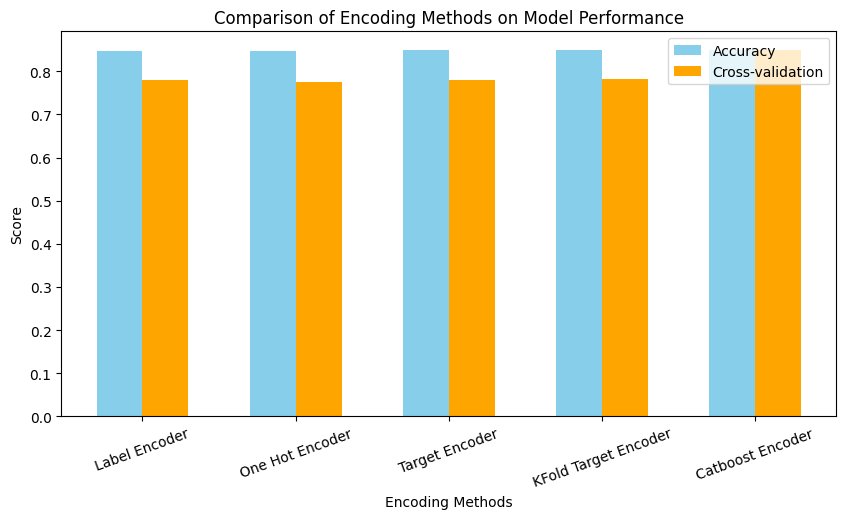

In [160]:
encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Catboost Encoder']
accuracy_scores = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy]
cv_scores = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_accuracy]


x = np.arange(len(encoding_methods))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='orange')

ax.set_xlabel('Encoding Methods')
ax.set_ylabel('Score')
ax.set_title('Comparison of Encoding Methods on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(encoding_methods, rotation=20)
ax.legend()

plt.show()


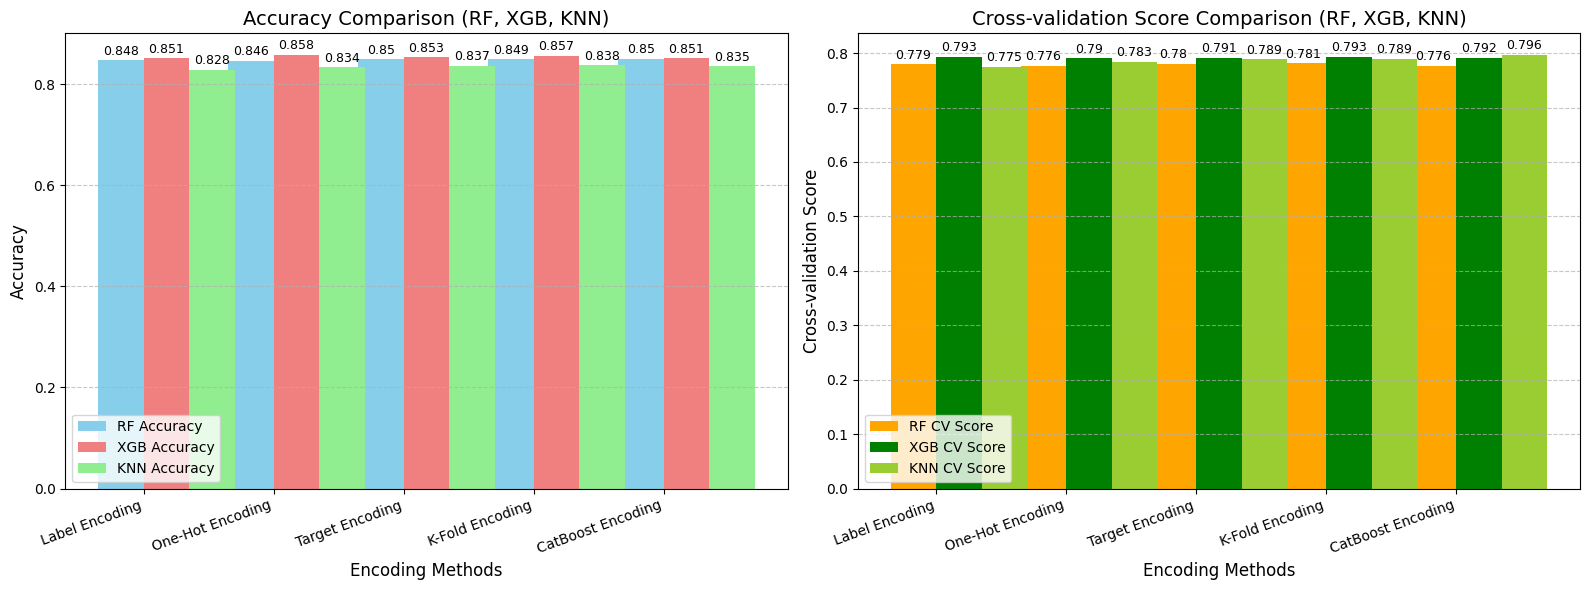

In [ ]:
# encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding']
# accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy]
# cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv]

# accuracy_xgb = [le_xgb_accuracy, ohe_xgb_accuracy, target_xgb_accuracy, kfold_xgb_accuracy, catboost_xgb_accuracy]
# cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv]

# accuracy_knn = [le_knn_accuracy, ohe_knn_accuracy, target_knn_accuracy, kfold_knn_accuracy, catboost_knn_accuracy]
# cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv]

# x = np.arange(len(encoding_methods))
# width = 0.35

# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# bars_rf_acc = axes[0].bar(x - width/2, accuracy_rf, width, label='RF Accuracy', color='skyblue')
# bars_xgb_acc = axes[0].bar(x + width/2, accuracy_xgb, width, label='XGB Accuracy', color='lightcoral')
# bars_knn_acc = axes[0].bar(x + width*1.5, accuracy_knn, width, label='KNN Accuracy', color='lightgreen')

# for bar in bars_rf_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# axes[0].set_xlabel('Encoding Methods', fontsize=12)
# axes[0].set_ylabel('Accuracy', fontsize=12)
# axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[0].legend(fontsize=10)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# bars_rf_cv = axes[1].bar(x - width/2, cv_rf, width, label='RF CV Score', color='orange')
# bars_xgb_cv = axes[1].bar(x + width/2, cv_xgb, width, label='XGB CV Score', color='green')
# bars_knn_cv = axes[1].bar(x + width*1.5, cv_knn, width, label='KNN CV Score', color='yellowgreen')

# for bar in bars_rf_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# axes[1].set_xlabel('Encoding Methods', fontsize=12)
# axes[1].set_ylabel('Cross-validation Score', fontsize=12)
# axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[1].legend(fontsize=10)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()


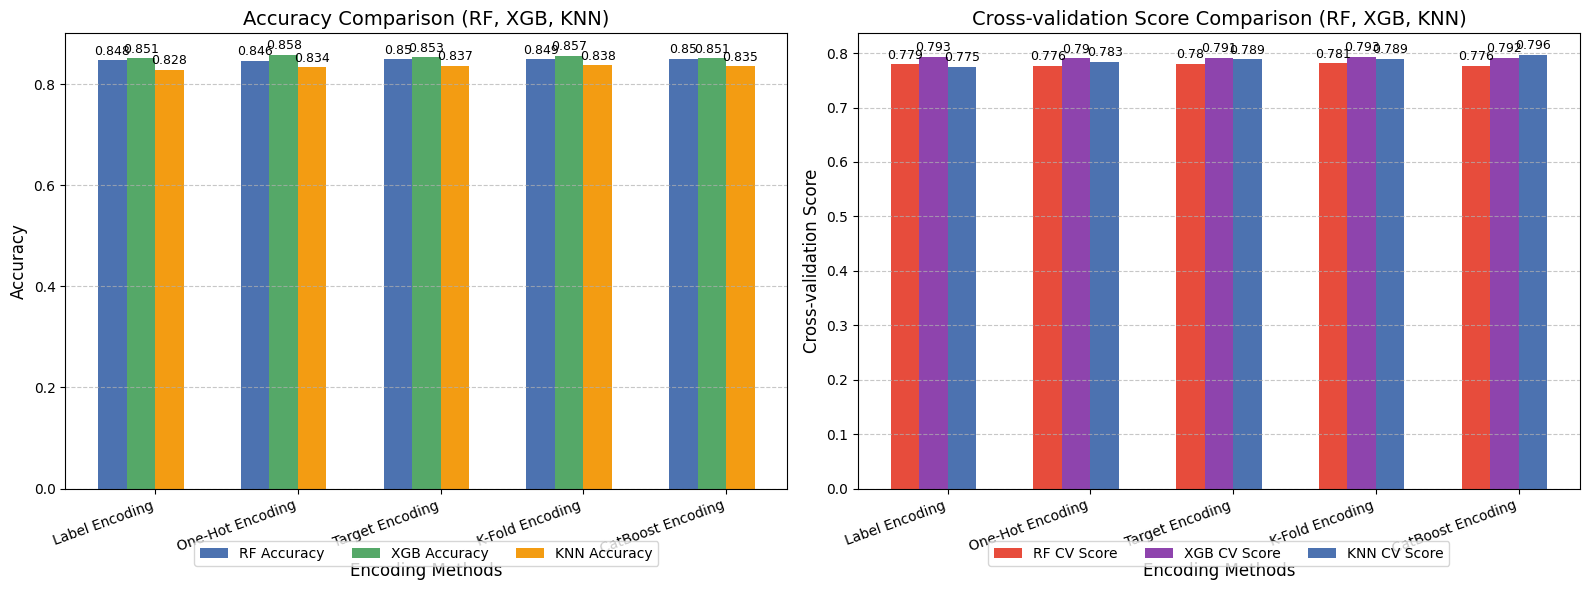

In [ ]:
# colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

# x = np.arange(len(encoding_methods))
# width = 0.2  # Adjust width for better spacing

# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # Bar charts for accuracy
# bars_rf_acc = axes[0].bar(x - width*1.5, accuracy_rf, width, label='RF Accuracy', color=colors[0])
# bars_xgb_acc = axes[0].bar(x - width/2, accuracy_xgb, width, label='XGB Accuracy', color=colors[1])
# bars_knn_acc = axes[0].bar(x + width/2, accuracy_knn, width, label='KNN Accuracy', color=colors[2])

# # Add labels on top of the bars
# for bar in bars_rf_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# # Set labels and title for accuracy chart
# axes[0].set_xlabel('Encoding Methods', fontsize=12)
# axes[0].set_ylabel('Accuracy', fontsize=12)
# axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[0].legend(fontsize=10, loc='upper left')
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# # Bar charts for cross-validation scores
# bars_rf_cv = axes[1].bar(x - width*1.5, cv_rf, width, label='RF CV Score', color=colors[3])
# bars_xgb_cv = axes[1].bar(x - width/2, cv_xgb, width, label='XGB CV Score', color=colors[4])
# bars_knn_cv = axes[1].bar(x + width/2, cv_knn, width, label='KNN CV Score', color=colors[0])

# # Add labels on top of the bars for CV scores
# for bar in bars_rf_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# # Set labels and title for CV chart
# axes[1].set_xlabel('Encoding Methods', fontsize=12)
# axes[1].set_ylabel('Cross-validation Score', fontsize=12)
# axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')

# axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout to avoid overlap
# plt.tight_layout()

# # Show the updated chart
# plt.show()


# MIX

In [44]:
df_read['Road_surface_conditions'].value_counts()

Road_surface_conditions
Dry                     9326
Wet or damp             2898
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

df_mix = df_read.copy()

if df_mix['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_mix['Accident_severity'] = le_target.fit_transform(df_mix['Accident_severity'])

df_mix['Hour'] = pd.to_datetime(df_mix['Time'], format='%H:%M:%S').dt.hour
df_mix.drop(columns=['Time'], inplace=True)

label_encoding_cols = ['Casualty_severity', 'Age_band_of_driver','Driving_experience', 'Light_conditions',  'Weather_conditions', 'Road_surface_conditions',]
one_hot_encoding_cols = ['Sex_of_driver', 'Type_of_vehicle', 
                        'Owner_of_vehicle', 'Vehicle_driver_relation', 'Road_surface_type']
kfold_encoding_cols = [ 'Type_of_collision', 'Types_of_Junction', 'Lanes_or_Medians',
                       'Day', 'Cause_of_accident', 'Hour', 'Area_accident_occured' , 'Road_allignment', 'Vehicle_movement']

for col in label_encoding_cols:
    le = LabelEncoder()
    df_mix[col] = le.fit_transform(df_mix[col])

df_mix = pd.get_dummies(df_mix, columns=one_hot_encoding_cols, dtype=int)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for col in kfold_encoding_cols:
    df_mix[col + '_kfold'] = 0
    for train_idx, val_idx in kf.split(df_mix):
        train_fold = df_mix.iloc[train_idx]
        val_fold = df_mix.iloc[val_idx]
        train_mean = train_fold.groupby(col)['Accident_severity'].mean()
        global_mean = df_mix['Accident_severity'].mean()
        df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)

df_mix.drop(columns=kfold_encoding_cols, inplace=True)

df_mix.head()


/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.81866667 1.84192778 1.81866667 ... 1.84192778 1.84192778 1.84192778]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)
/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.80944572 1.83546035 1.83546035 ... 1.80239521 1.80944572 1.80944572]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = val_fold[col].map(train_mean).fillna(global_mean)
/tmp/ipykernel_10539/3852181048.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.82898172 1.83028919 1.8302

,Age_band_of_driver,Driving_experience,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Sex_of_driver_Female,...,Road_surface_type_Other,Type_of_collision_kfold,Types_of_Junction_kfold,Lanes_or_Medians_kfold,Day_kfold,Cause_of_accident_kfold,Hour_kfold,Area_accident_occured_kfold,Road_allignment_kfold,Vehicle_movement_kfold
0,0,0,0,2,2,2,2,3,2,0,...,0,1.818667,1.809446,1.828982,1.868401,1.799342,1.858859,1.806728,1.834159,1.836234
1,1,3,0,2,2,2,2,3,2,0,...,0,1.833895,1.807895,1.823960,1.857143,1.788868,1.863450,1.835946,1.828703,1.829303
2,0,0,0,2,2,2,2,2,1,0,...,0,1.822481,1.816392,1.830664,1.860759,1.831005,1.852729,1.830827,1.834911,1.835802
3,0,2,0,0,2,2,2,2,2,0,...,0,1.841928,1.835460,1.830289,1.816132,1.835800,1.837838,1.843273,1.843829,1.836234
4,0,1,0,0,2,2,2,3,2,0,...,0,1.833895,1.826399,1.818807,1.817708,1.788868,1.819820,1.827869,1.828703,1.829303


In [68]:
X_mix = df_mix.drop(columns=['Accident_severity'])
y_mix = df_mix['Accident_severity']

X_train_mix, X_test_mix, y_train_mix, y_test_mix = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42, stratify=y_mix)

In [166]:
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# # X dan y
# X = df_mix.drop(columns=['Accident_severity'])  # Fitur
# y = df_mix['Accident_severity']  # Target

# # Definisikan model yang akan diuji
# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
#     "Support Vector Machine": SVC(class_weight='balanced', random_state=42),
#     "Naive Bayes": GaussianNB(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
#     "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
# }

# # Definisikan KFold Cross Validation (5-fold)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Fungsi untuk melakukan KFold Cross-Validation dan mengembalikan skor evaluasi
# def evaluate_model_kfold(model, X, y, kf):
#     accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
#     precision_scores = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
#     recall_scores = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')
#     f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')
    
#     return accuracy_scores.mean(), precision_scores.mean(), recall_scores.mean(), f1_scores.mean()

# # Evaluasi model
# results = []

# for name, model in models.items():
#     accuracy, precision, recall, f1 = evaluate_model_kfold(model, X, y, kf)
#     results.append([name, accuracy, precision, recall, f1])

# # Tampilkan hasil evaluasi
# results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
# print(results_df)


In [ ]:
# def evaluate_encoding(X_encoded, name):
#     score = np.mean(cross_val_score(RandomForestClassifier(), X_encoded, y_train, cv=5))
#     print(f"{name}: {score:.4f}")
#     return score

# print("Cross-Validation Scores:")
# # score_ohe = evaluate_encoding(X_train, "One-Hot Encoding")
# # score_le = evaluate_encoding(X_train, "Label Encoding")
# # score_te = evaluate_encoding(X_train, "Target Encoding")
# score_freq = evaluate_encoding(X_train, "Mix Encoding")

# print("\nMutual Information Scores:")
# mi_scores = {
#     # 'One-Hot': mutual_info_classif(X_train, y_train).mean(),
#     # 'Label Encoding': mutual_info_classif(X_train_le, y_train).mean(),
#     # 'Target Encoding': mutual_info_classif(X_train, y_train).mean(),
#     'MixEncoding': mutual_info_classif(X_train, y_train).mean()
# }
# for key, value in mi_scores.items():
#     print(f"{key}: {value:.4f}")


Cross-Validation Scores:


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarni

Mix Encoding: 0.8473

Mutual Information Scores:


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Parameters


MixEncoding: 0.0014


In [ ]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression

# # Membagi data menjadi train dan test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Random Forest Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# mix_rf_f1_score = f1_score(y_test, rf_pred, average='weighted')
# rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')
# mix_rf_cv = rf_cv_scores.mean()

# # XGBoost Model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# mix_xgb_f1_score = f1_score(y_test, xgb_pred, average='weighted')
# xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='f1_weighted')
# mix_xgb_cv = xgb_cv_scores.mean()

# # KNeighborsClassifier Model
# knn_model = KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)
# knn_pred = knn_model.predict(X_test)

# mix_knn_f1_score = f1_score(y_test, knn_pred, average='weighted')
# knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='f1_weighted')
# mix_knn_cv = knn_cv_scores.mean()

# # Extra Trees Classifier Model
# et_model = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# et_model.fit(X_train, y_train)
# et_pred = et_model.predict(X_test)

# mix_et_f1_score = f1_score(y_test, et_pred, average='weighted')
# et_cv_scores = cross_val_score(et_model, X, y, cv=5, scoring='f1_weighted')
# mix_et_cv = et_cv_scores.mean()

# # Logistic Regression Model
# lr_model = LogisticRegression(max_iter=1000, random_state=42)
# lr_model.fit(X_train, y_train)
# lr_pred = lr_model.predict(X_test)

# mix_lr_f1_score = f1_score(y_test, lr_pred, average='weighted')
# lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='f1_weighted')
# mix_lr_cv = lr_cv_scores.mean()

# # Menampilkan hasil evaluasi
# print("Random Forest F1 Score:", mix_rf_f1_score, "Cross-Validation F1 Score:", mix_rf_cv)
# print("XGBoost F1 Score:", mix_xgb_f1_score, "Cross-Validation F1 Score:", mix_xgb_cv)
# print("KNN F1 Score:", mix_knn_f1_score, "Cross-Validation F1 Score:", mix_knn_cv)
# print("Extra Trees F1 Score:", mix_et_f1_score, "Cross-Validation F1 Score:", mix_et_cv)
# print("Logistic Regression F1 Score:", mix_lr_f1_score, "Cross-Validation F1 Score:", mix_lr_cv)


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:41:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:43:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [01:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

Random Forest F1 Score: 0.7778996364403513 Cross-Validation F1 Score: 0.7757672251490394
XGBoost F1 Score: 0.801537263145062 Cross-Validation F1 Score: 0.786404660969647
KNN F1 Score: 0.7841786864288806 Cross-Validation F1 Score: 0.7791545766757386
Extra Trees F1 Score: 0.7812150563435621 Cross-Validation F1 Score: 0.7789754751555072
Logistic Regression F1 Score: 0.7772454825875926 Cross-Validation F1 Score: 0.7752608859289839


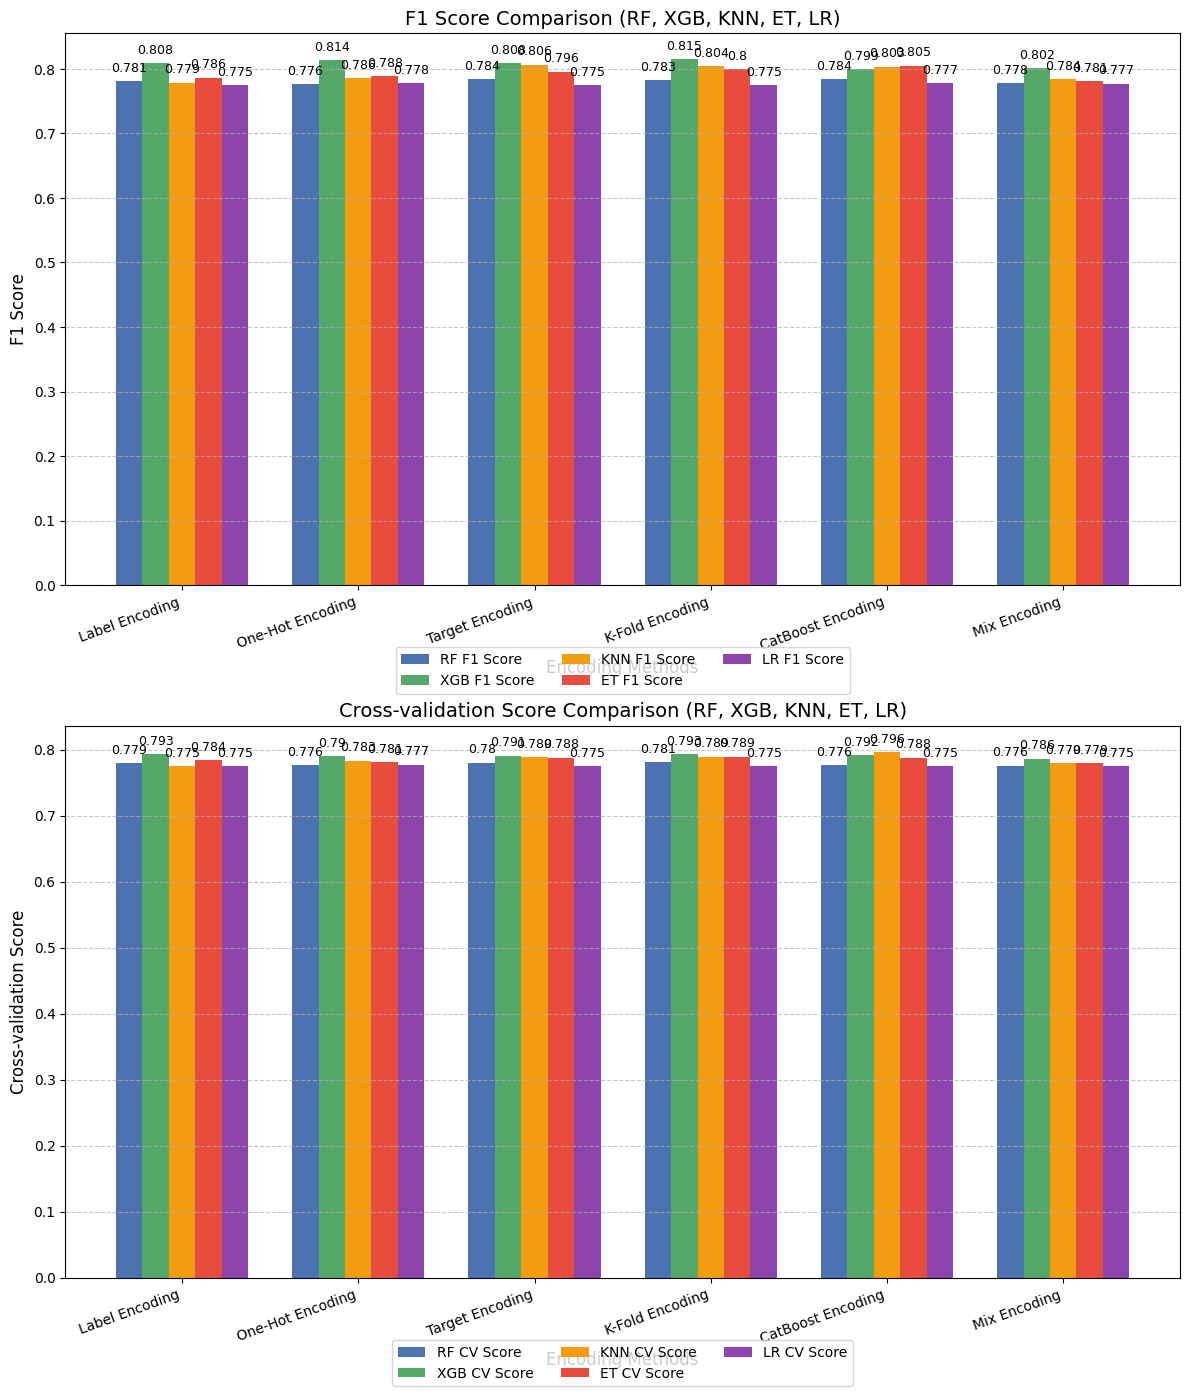

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.metrics import f1_score

# # Colors for the bars
# colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad', '#1f77b4', '#ff7f0e']

# # Encoding methods and model names
# encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding', 'Mix Encoding']

# # Replace accuracy with f1_score
# f1_rf = [le_rf_f1_score, ohe_rf_f1_score, target_rf_f1_score, kfold_rf_f1_score, catboost_rf_f1_score, mix_rf_f1_score]
# cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv, mix_rf_cv]

# f1_xgb = [le_xgb_f1_score, ohe_xgb_f1_score, target_xgb_f1_score, kfold_xgb_f1_score, catboost_xgb_f1_score, mix_xgb_f1_score]
# cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv, mix_xgb_cv]

# f1_knn = [le_knn_f1_score, ohe_knn_f1_score, target_knn_f1_score, kfold_knn_f1_score, catboost_knn_f1_score, mix_knn_f1_score]
# cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv, mix_knn_cv]

# # Add Extra Trees and Logistic Regression metrics
# f1_et = [le_extra_trees_f1_score, ohe_extra_trees_f1_score, target_extra_trees_f1_score, kfold_extra_trees_f1_score, catboost_et_f1_score, mix_et_f1_score]
# cv_et = [le_extra_trees_cv, ohe_extra_trees_cv, target_extra_trees_cv, kfold_extra_trees_cv, catboost_et_cv, mix_et_cv]

# f1_lr = [le_logreg_f1_score, ohe_logreg_f1_score, target_logreg_f1_score, kfold_logreg_f1_score, catboost_lr_f1_score, mix_lr_f1_score]
# cv_lr = [le_logreg_cv, ohe_logreg_cv, target_logreg_cv, kfold_logreg_cv, catboost_lr_cv, mix_lr_cv]

# # Warna untuk bar
# colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

# # Warna untuk bar
# colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

# # Posisi sumbu-x untuk metode encoding
# x = np.arange(len(encoding_methods))
# width = 0.15  # Lebar bar yang disesuaikan

# # Membuat subplots (vertikal)
# fig, axes = plt.subplots(2, 1, figsize=(12, 14)) # Mengubah menjadi 2 baris, 1 kolom

# # Fungsi untuk membuat bar dan menambahkan label
# def create_bars(ax, x_positions, data, width, label, color):
#     bars = ax.bar(x_positions, data, width, label=label, color=color)
#     for bar in bars:
#         yval = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)
#     return bars

# # Plot F1 Score
# x_rf_f1 = x - 2 * width
# x_xgb_f1 = x - width
# x_knn_f1 = x
# x_et_f1 = x + width
# x_lr_f1 = x + 2 * width

# create_bars(axes[0], x_rf_f1, f1_rf, width, 'RF F1 Score', colors[0])
# create_bars(axes[0], x_xgb_f1, f1_xgb, width, 'XGB F1 Score', colors[1])
# create_bars(axes[0], x_knn_f1, f1_knn, width, 'KNN F1 Score', colors[2])
# create_bars(axes[0], x_et_f1, f1_et, width, 'ET F1 Score', colors[3])
# create_bars(axes[0], x_lr_f1, f1_lr, width, 'LR F1 Score', colors[4])

# axes[0].set_xlabel('Encoding Methods', fontsize=12)
# axes[0].set_ylabel('F1 Score', fontsize=12)
# axes[0].set_title('F1 Score Comparison (RF, XGB, KNN, ET, LR)', fontsize=14)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# # Plot Cross-validation Score
# x_rf_cv = x - 2 * width
# x_xgb_cv = x - width
# x_knn_cv = x
# x_et_cv = x + width
# x_lr_cv = x + 2 * width

# create_bars(axes[1], x_rf_cv, cv_rf, width, 'RF CV Score', colors[0])
# create_bars(axes[1], x_xgb_cv, cv_xgb, width, 'XGB CV Score', colors[1])
# create_bars(axes[1], x_knn_cv, cv_knn, width, 'KNN CV Score', colors[2])
# create_bars(axes[1], x_et_cv, cv_et, width, 'ET CV Score', colors[3])
# create_bars(axes[1], x_lr_cv, cv_lr, width, 'LR CV Score', colors[4])

# axes[1].set_xlabel('Encoding Methods', fontsize=12)
# axes[1].set_ylabel('Cross-validation Score', fontsize=12)
# axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN, ET, LR)', fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# # Mengatur layout agar tidak tumpang tindih
# plt.tight_layout()

# # Menampilkan grafik
# plt.show()

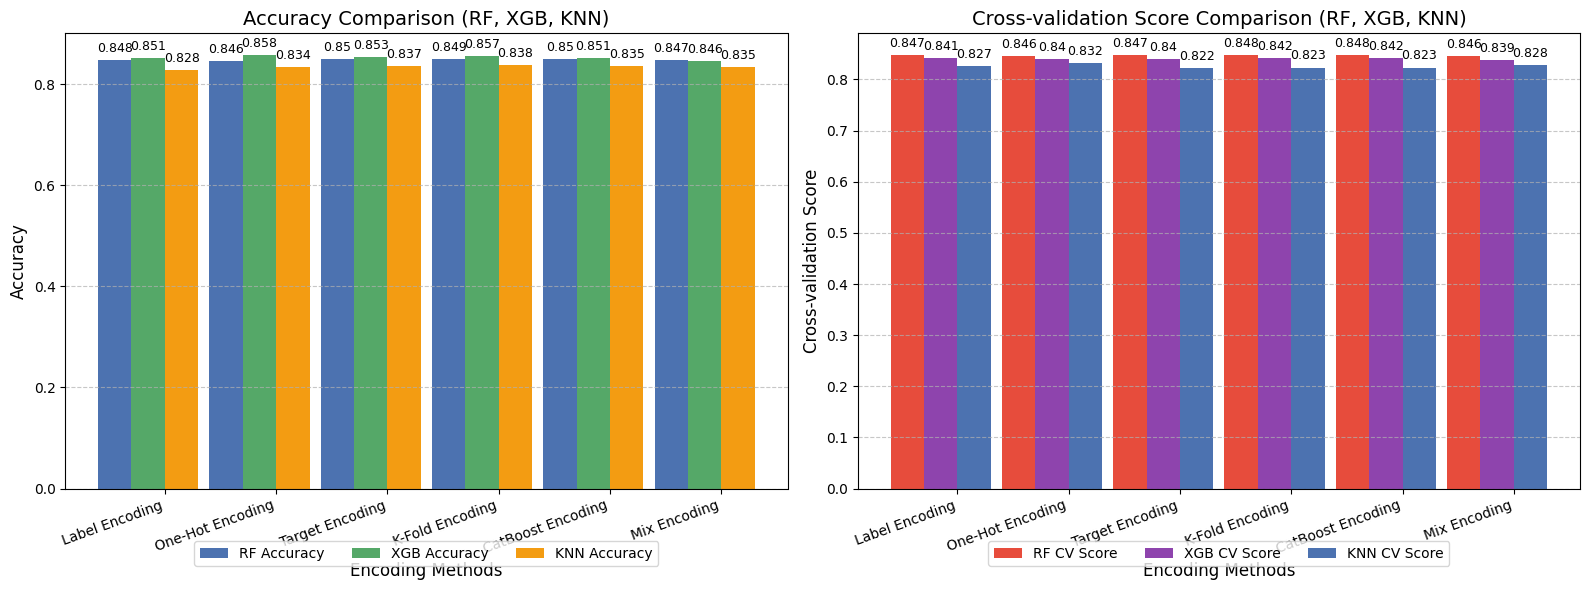

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Colors for the bars
# colors = ['#4c72b0', '#55a868', '#f39c12', '#e74c3c', '#8e44ad']

# encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'CatBoost Encoding', 'Mix Encoding']
# accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, catboost_rf_accuracy, mix_rf_accuracy]
# cv_rf = [le_rf_cv, ohe_rf_cv, target_rf_cv, kfold_rf_cv, catboost_rf_cv, mix_rf_cv]

# accuracy_xgb = [le_xgb_accuracy, ohe_xgb_accuracy, target_xgb_accuracy, kfold_xgb_accuracy, catboost_xgb_accuracy, mix_xgb_accuracy]
# cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, catboost_xgb_cv, mix_xgb_cv]

# accuracy_knn = [le_knn_accuracy, ohe_knn_accuracy, target_knn_accuracy, kfold_knn_accuracy, catboost_knn_accuracy, mix_knn_accuracy]
# cv_knn = [le_knn_cv, ohe_knn_cv, target_knn_cv, kfold_knn_cv, catboost_knn_cv, mix_knn_cv]

# # X-axis positions for encoding methods
# x = np.arange(len(encoding_methods))
# width = 0.3  # Increased width for wider bars

# # Create subplots
# fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# # Bar charts for accuracy
# bars_rf_acc = axes[0].bar(x - width*1.5, accuracy_rf, width, label='RF Accuracy', color=colors[0])
# bars_xgb_acc = axes[0].bar(x - width/2, accuracy_xgb, width, label='XGB Accuracy', color=colors[1])
# bars_knn_acc = axes[0].bar(x + width/2, accuracy_knn, width, label='KNN Accuracy', color=colors[2])

# # Add labels on top of the bars for accuracy
# for bar in bars_rf_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# # Set labels and title for accuracy chart
# axes[0].set_xlabel('Encoding Methods', fontsize=12)
# axes[0].set_ylabel('Accuracy', fontsize=12)
# axes[0].set_title('Accuracy Comparison (RF, XGB, KNN)', fontsize=14)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[0].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# # Bar charts for cross-validation scores
# bars_rf_cv = axes[1].bar(x - width*1.5, cv_rf, width, label='RF CV Score', color=colors[3])
# bars_xgb_cv = axes[1].bar(x - width/2, cv_xgb, width, label='XGB CV Score', color=colors[4])
# bars_knn_cv = axes[1].bar(x + width/2, cv_knn, width, label='KNN CV Score', color=colors[0])

# # Add labels on top of the bars for CV scores
# for bar in bars_rf_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_knn_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize=9)

# # Set labels and title for CV chart
# axes[1].set_xlabel('Encoding Methods', fontsize=12)
# axes[1].set_ylabel('Cross-validation Score', fontsize=12)
# axes[1].set_title('Cross-validation Score Comparison (RF, XGB, KNN)', fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[1].legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# # Tight layout to avoid overlap
# plt.tight_layout()

# # Show the updated chart
# plt.show()


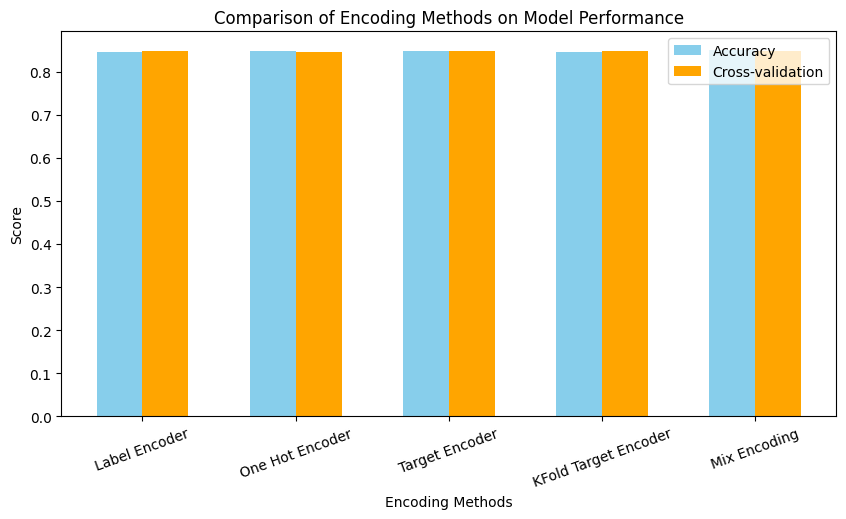

In [ ]:
# encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Mix Encoding']
# accuracy_scores = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, mix_rf_accuracy]
# cv_scores = [le_rv_cv, ohe_rv_cv, target_rv_cv, kfold_rv_cv, mix_rv_cv]


# x = np.arange(len(encoding_methods))
# width = 0.3

# fig, ax = plt.subplots(figsize=(10, 5))
# ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
# ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='orange')

# ax.set_xlabel('Encoding Methods')
# ax.set_ylabel('Score')
# ax.set_title('Comparison of Encoding Methods on Model Performance')
# ax.set_xticks(x)
# ax.set_xticklabels(encoding_methods, rotation=20)
# ax.legend()

# plt.show()


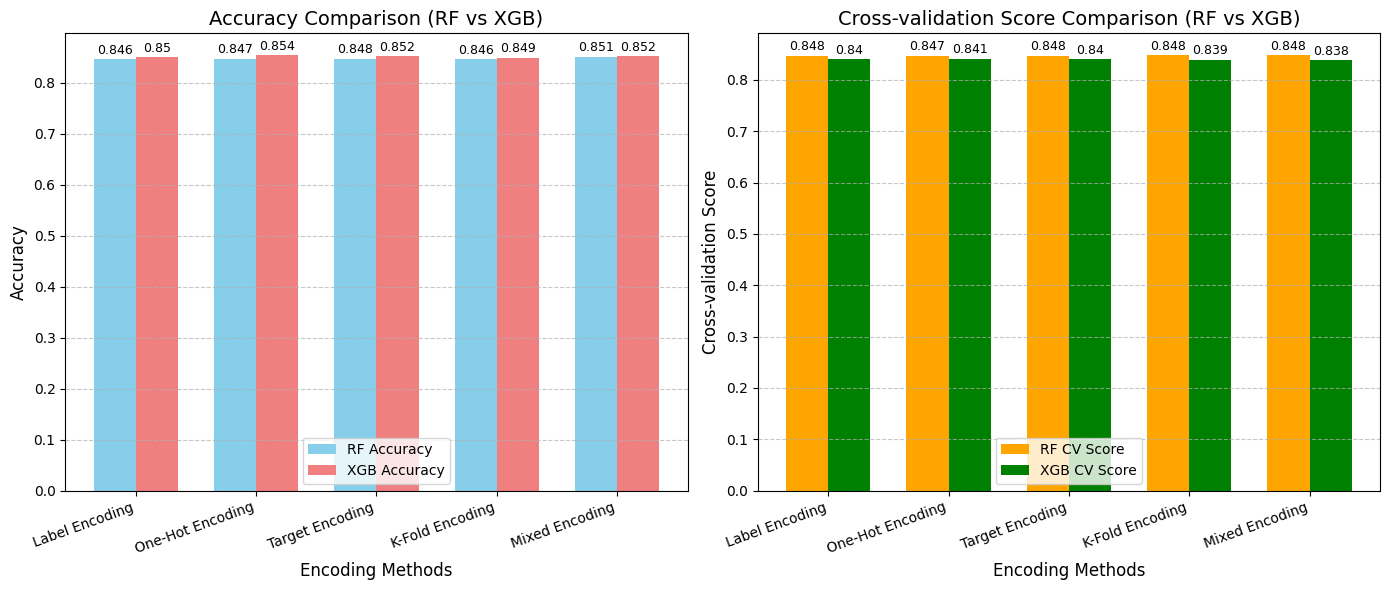

In [ ]:

# encoding_methods = ['Label Encoding', 'One-Hot Encoding', 'Target Encoding', 'K-Fold Encoding', 'Mixed Encoding']
# accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, mix_rf_accuracy]
# cv_rf = [le_rv_cv, ohe_rv_cv, target_rv_cv, kfold_rv_cv, mix_rv_cv]

# accuracy_xgb = [le_xgb_acccuracy, ohe_xgb_acccuracy, target_xgb_acccuracy, kfold_xgb_acccuracy, mix_xgb_acccuracy]
# cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, mix_xgb_cv]

# x = np.arange(len(encoding_methods))
# width = 0.35

# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# bars_rf_acc = axes[0].bar(x - width/2, accuracy_rf, width, label='RF Accuracy', color='skyblue')
# bars_xgb_acc = axes[0].bar(x + width/2, accuracy_xgb, width, label='XGB Accuracy', color='lightcoral')

# for bar in bars_rf_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_acc:
#     yval = bar.get_height()
#     axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# axes[0].set_xlabel('Encoding Methods', fontsize=12)
# axes[0].set_ylabel('Accuracy', fontsize=12)
# axes[0].set_title('Accuracy Comparison (RF vs XGB)', fontsize=14)
# axes[0].set_xticks(x)
# axes[0].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[0].legend(fontsize=10)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# bars_rf_cv = axes[1].bar(x - width/2, cv_rf, width, label='RF CV Score', color='orange')
# bars_xgb_cv = axes[1].bar(x + width/2, cv_xgb, width, label='XGB CV Score', color='green')

# for bar in bars_rf_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# for bar in bars_xgb_cv:
#     yval = bar.get_height()
#     axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 3), ha='center', va='bottom', fontsize=9)

# axes[1].set_xlabel('Encoding Methods', fontsize=12)
# axes[1].set_ylabel('Cross-validation Score', fontsize=12)
# axes[1].set_title('Cross-validation Score Comparison (RF vs XGB)', fontsize=14)
# axes[1].set_xticks(x)
# axes[1].set_xticklabels(encoding_methods, rotation=20, ha='right')
# axes[1].legend(fontsize=10)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# plt.tight_layout()
# plt.show()

# Outlier

In [26]:
def std(data: list, ddof: int = 1) -> float:
    if ddof > 1 or ddof < 0:
        raise ValueError('ddof must be greater than 0')
    n = len(data)
    mean = sum(data) / n
    total_variance = sum((x - mean) ** 2 for x in data)
    variance = total_variance / (n - ddof)
    stdev = variance ** 0.5
    return stdev

def z_scores_1(num, data):
    mean = sum(data) / len(data)
    std_dev = std(data)
    return (num - mean) / std_dev

def detect_outliers(data, threshold=3):
    outliers = []
    mean = sum(data) / len(data)
    stdev_value = std(data)
    
    for i, num in enumerate(data):
        z_score = (num - mean) / stdev_value
        if abs(z_score) > threshold:  
            outliers.append(i) 
    
    return outliers

outliers_vehicles = detect_outliers(df_read['Number_of_casualties'])
print(f"Outliers pada 'Number_of_vehicles_involved': {outliers_vehicles}")

outliers_casualties = detect_outliers(df_read['Number_of_vehicles_involved'])
print(f"Outliers pada 'Number_of_casualties': {outliers_casualties}")


Outliers pada 'Number_of_vehicles_involved': [319, 320, 321, 322, 323, 324, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 697, 698, 699, 700, 701, 733, 734, 735, 736, 737, 920, 921, 922, 923, 924, 1140, 1141, 1142, 1143, 1144, 1145, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1575, 1576, 1577, 1578, 1579, 1580, 2490, 2491, 2492, 2493, 2494, 2495, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 4086, 4087, 4088, 4089, 4090, 5058, 5059, 5060, 5061, 5062, 5095, 5096, 5097, 5098, 5099, 5100, 5428, 5429, 5430, 5431, 5432, 5433, 5697, 5698, 5699, 5700, 5701, 5702, 5712, 5713, 5714, 5715, 5716, 5955, 5956, 5957, 5958, 5959, 5960, 6020, 6021, 6022, 6023, 6024, 6025, 6221, 6222, 6223, 6224, 6225, 6232, 6233, 6234, 6235, 6236, 6237, 6238, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6408, 6409, 6410, 6411, 6412, 6413, 6414, 6911, 6912, 6913, 6914, 6915, 6916, 7024, 7025, 7026, 7027, 7028, 7215, 7216, 7217, 7218, 7219, 7431, 7432, 7433, 7434

In [27]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    return outliers

outliers_vehicles_iqr = detect_outliers_iqr(df_mix['Number_of_vehicles_involved'])
print(f"Outliers pada 'Number_of_vehicles_involved' dengan IQR: {outliers_vehicles_iqr}")

outliers_casualties_iqr = detect_outliers_iqr(df_mix['Number_of_casualties'])
print(f"Outliers pada 'Number_of_casualties' dengan IQR: {outliers_casualties_iqr}")


Outliers pada 'Number_of_vehicles_involved' dengan IQR: [5, 6, 21, 27, 30, 31, 45, 72, 73, 74, 75, 76, 77, 82, 83, 95, 96, 97, 106, 107, 108, 109, 110, 111, 112, 113, 116, 117, 124, 125, 126, 127, 130, 131, 132, 133, 134, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 180, 186, 187, 188, 189, 195, 196, 197, 198, 199, 200, 219, 224, 225, 226, 227, 228, 229, 230, 240, 241, 242, 254, 262, 269, 270, 271, 279, 280, 286, 287, 288, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 307, 308, 309, 310, 311, 312, 313, 314, 325, 326, 327, 328, 333, 340, 343, 344, 347, 348, 355, 356, 360, 361, 362, 363, 364, 368, 376, 377, 378, 379, 380, 381, 386, 387, 388, 389, 390, 391, 398, 401, 409, 412, 415, 418, 419, 420, 423, 424, 425, 426, 427, 428, 432, 433, 434, 435, 442, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 463, 464, 465, 466, 467, 468, 471, 472, 483, 484, 485, 486, 490, 495, 496, 497, 503, 504, 505, 506, 509, 510, 511, 512, 513, 514, 515, 516, 532, 535

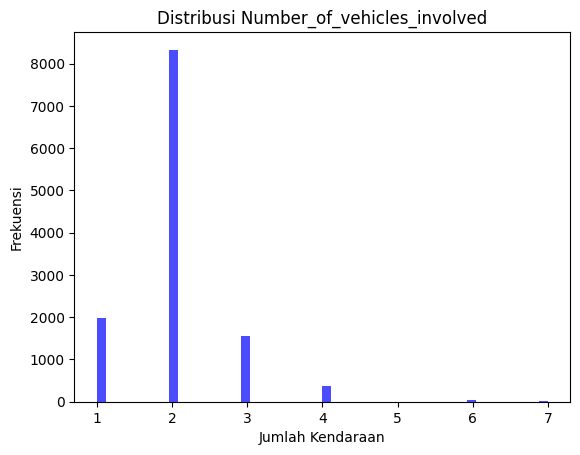

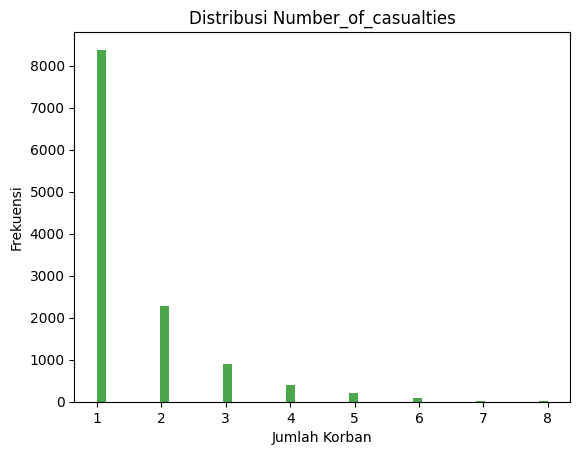

In [28]:
import matplotlib.pyplot as plt

# Visualisasikan distribusi data untuk kolom Number_of_vehicles_involved
plt.hist(df_mix['Number_of_vehicles_involved'], bins=50, color='blue', alpha=0.7)
plt.title('Distribusi Number_of_vehicles_involved')
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasikan distribusi data untuk kolom Number_of_casualties
plt.hist(df_mix['Number_of_casualties'], bins=50, color='green', alpha=0.7)
plt.title('Distribusi Number_of_casualties')
plt.xlabel('Jumlah Korban')
plt.ylabel('Frekuensi')
plt.show()


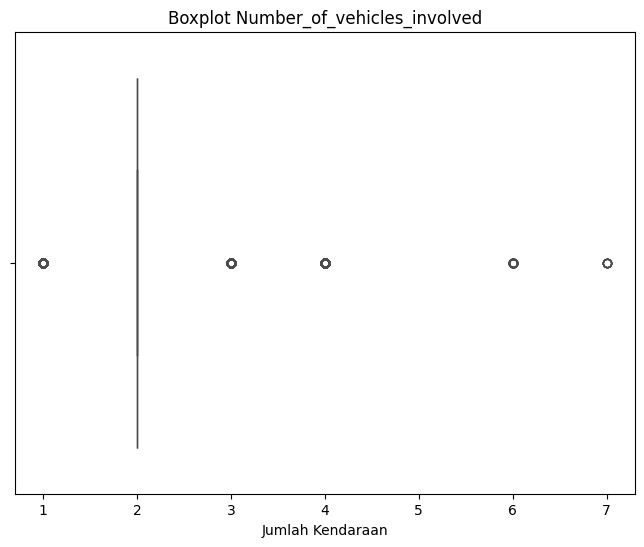

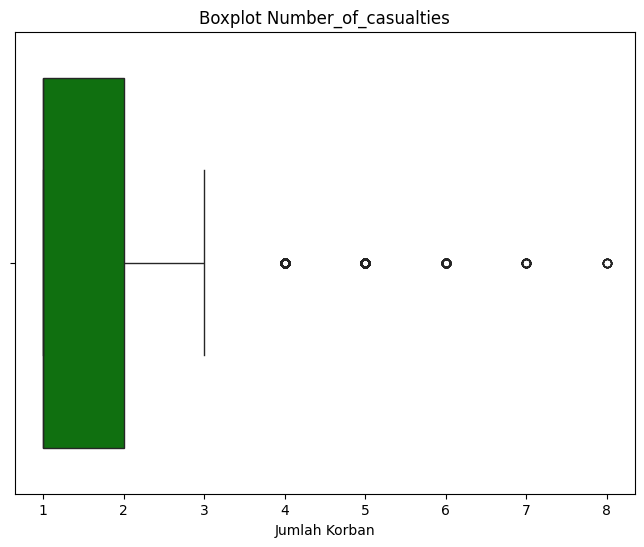

In [29]:
# Boxplot untuk Number_of_vehicles_involved
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mix['Number_of_vehicles_involved'], color='blue')
plt.title('Boxplot Number_of_vehicles_involved')
plt.xlabel('Jumlah Kendaraan')
plt.show()

# Boxplot untuk Number_of_casualties
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_mix['Number_of_casualties'], color='green')
plt.title('Boxplot Number_of_casualties')
plt.xlabel('Jumlah Korban')
plt.show()


In [ ]:
# df_mix.to_csv('../datasets/dataafterencod.csv', index=False)

# Feature Selection

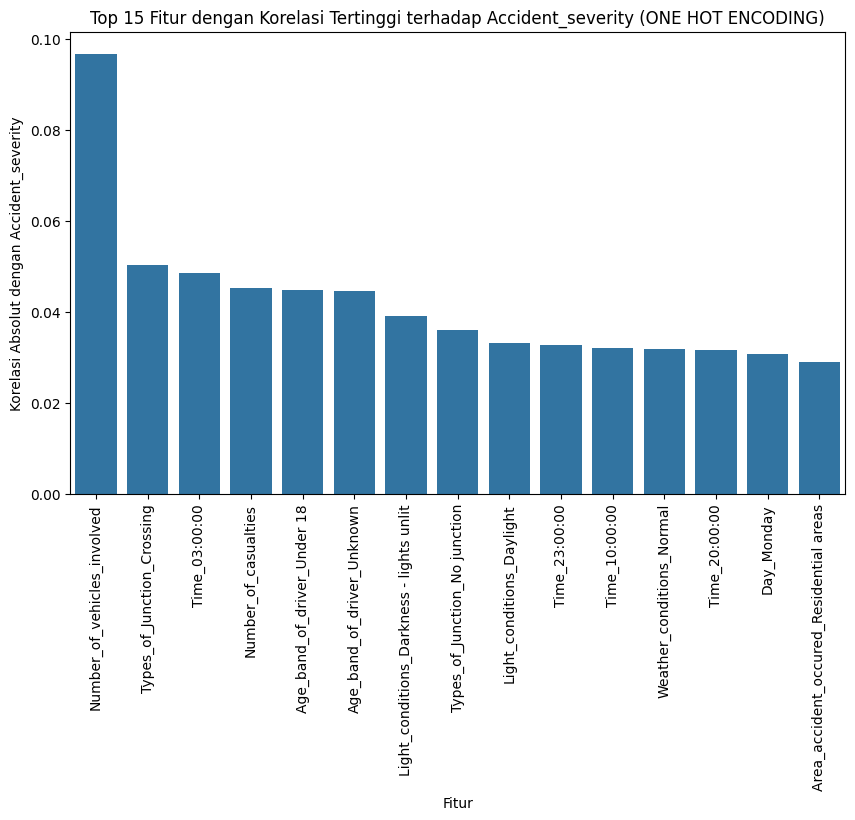

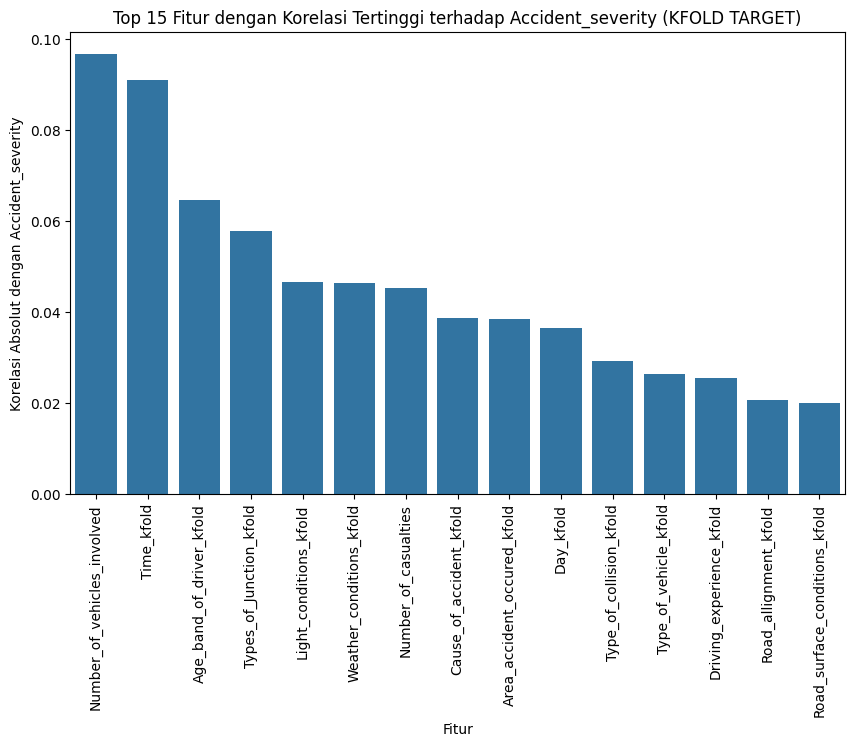

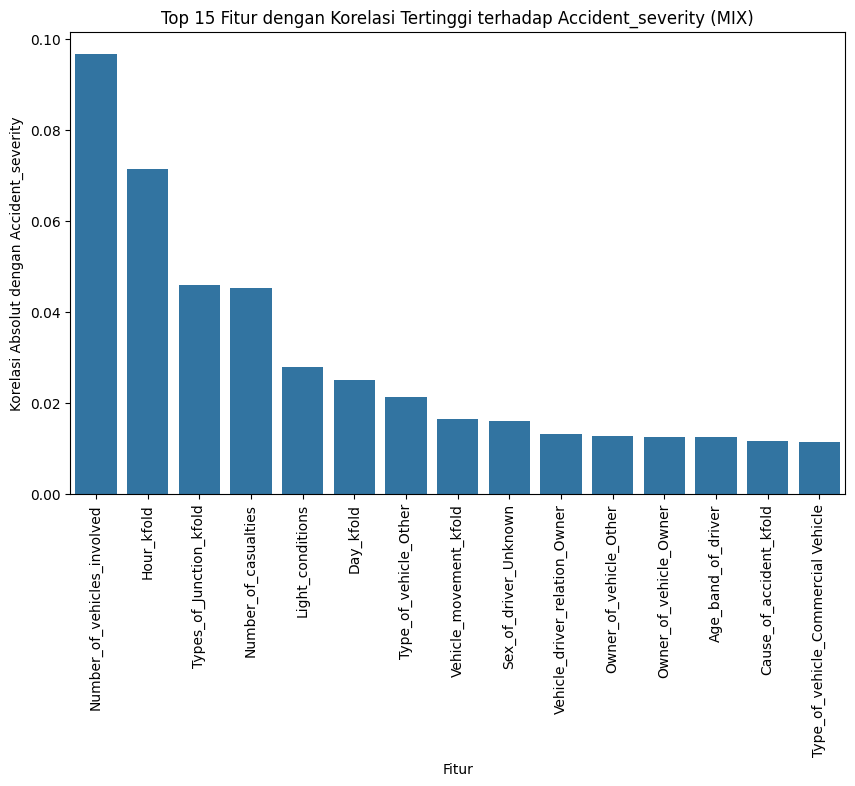

['Driving_experience',
 'Road_surface_conditions',
 'Casualty_severity',
 'Sex_of_driver_Female',
 'Sex_of_driver_Male',
 'Type_of_vehicle_Non-Motorized',
 'Type_of_vehicle_Private Vehicle',
 'Type_of_vehicle_Public Transport',
 'Owner_of_vehicle_Governmental',
 'Owner_of_vehicle_Organization',
 'Vehicle_driver_relation_Employee',
 'Vehicle_driver_relation_Other',
 'Vehicle_driver_relation_Unknown',
 'Road_surface_type_Asphalt roads',
 'Road_surface_type_Earth roads',
 'Road_surface_type_Gravel roads',
 'Road_surface_type_Other',
 'Type_of_collision_kfold',
 'Lanes_or_Medians_kfold',
 'Area_accident_occured_kfold',
 'Road_allignment_kfold']

In [31]:
# ohe
corr_matrix = df_ohe.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (ONE HOT ENCODING)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# kfold
corr_matrix = df_kfold.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (KFOLD TARGET)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features

# mix
corr_matrix = df_mix.corr()
target_corr = corr_matrix["Accident_severity"].drop("Accident_severity")

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.abs().sort_values(ascending=False)[:15].index,
            y=target_corr.abs().sort_values(ascending=False)[:15])
plt.xticks(rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Korelasi Absolut dengan Accident_severity")
plt.title("Top 15 Fitur dengan Korelasi Tertinggi terhadap Accident_severity (MIX)")
plt.show()

low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
low_corr_features



# lassso

Fitur yang dipilih oleh Lasso:
['Age_band_of_driver', 'Driving_experience', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Casualty_severity', 'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown', 'Type_of_vehicle_Commercial Vehicle', 'Type_of_vehicle_Non-Motorized', 'Type_of_vehicle_Other', 'Type_of_vehicle_Private Vehicle', 'Type_of_vehicle_Special Vehicle', 'Owner_of_vehicle_Governmental', 'Owner_of_vehicle_Organization', 'Owner_of_vehicle_Other', 'Owner_of_vehicle_Owner', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Road_surface_type_Asphalt roads with some distress', 'Road_surface_type_Earth roads', 'Road_surface_type_Gravel roads', 'Road_surface_type_Other', 'Types_of_Junction_kfold', 'Lanes_or_Medians_kfold', 'Hour_kfold', 'Road_allignment_kfold', 'Vehicle_movement_kfold']


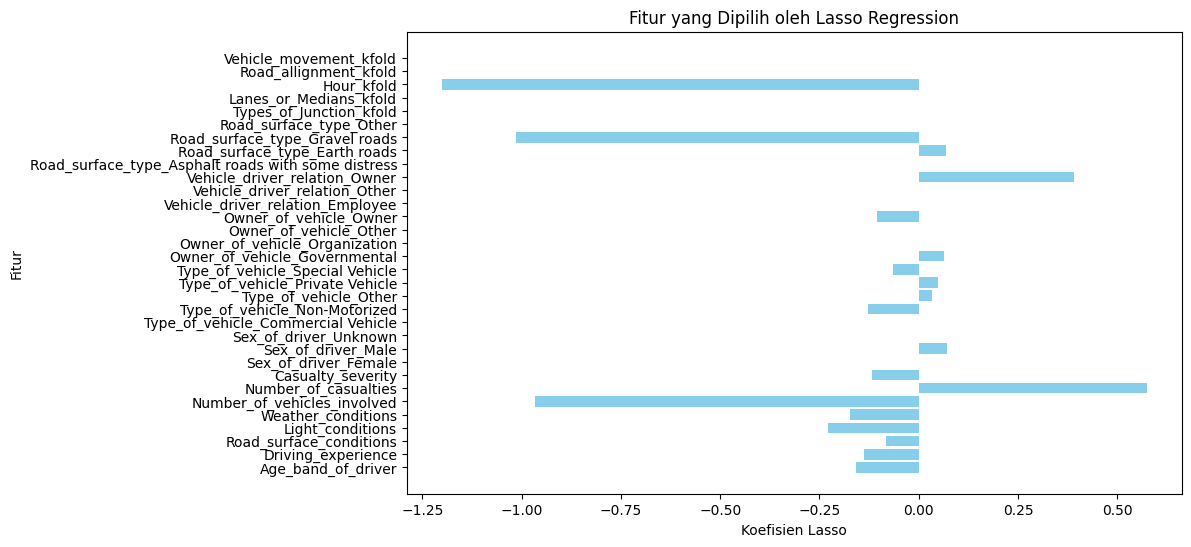

In [ ]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_mix, y_train_mix)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_mix.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_mix.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 6))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()



Fitur yang dipilih oleh Lasso:
['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_00:00:00', 'Time_02:00:00', 'Time_03:00:00', 'Time_04:00:00', 'Time_05:00:00', 'Time_06:00:00', 'Time_07:00:00', 'Time_08:00:00', 'Time_09:00:00', 'Time_10:00:00', 'Time_11:00:00', 'Time_12:00:00', 'Time_13:00:00', 'Time_14:00:00', 'Time_15:00:00', 'Time_16:00:00', 'Time_17:00:00', 'Time_18:00:00', 'Time_19:00:00', 'Time_20:00:00', 'Time_21:00:00', 'Time_22:00:00', 'Time_23:00:00', 'Age_band_of_driver_18-30', 'Age_band_of_driver_31-50', 'Age_band_of_driver_Over 51', 'Age_band_of_driver_Under 18', 'Age_band_of_driver_Unknown', 'Sex_of_driver_Female', 'Sex_of_driver_Male', 'Sex_of_driver_Unknown', 'Vehicle_driver_relation_Employee', 'Vehicle_driver_relation_Other', 'Vehicle_driver_relation_Owner', 'Vehicle_driver_relation_Unknown', 'Driving_experience_1-2yr', 'Driving_experience_2-5yr', 'Driving_experience_5-10yr', 'Driving_experience_Above 10yr', 'Driving_experience_Below 1yr', 'Driving_experien

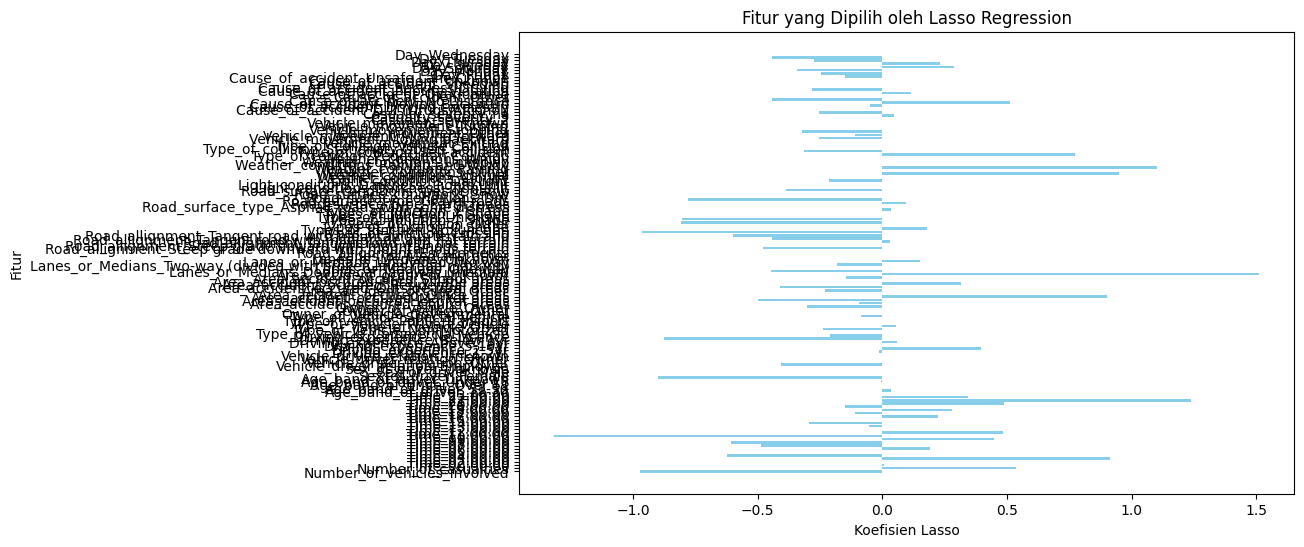

In [49]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_ohe, y_train_ohe)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_ohe.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_ohe.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 6))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()


Fitur yang dipilih oleh Lasso:
['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_kfold', 'Age_band_of_driver_kfold', 'Sex_of_driver_kfold', 'Vehicle_driver_relation_kfold', 'Driving_experience_kfold', 'Owner_of_vehicle_kfold', 'Lanes_or_Medians_kfold', 'Road_allignment_kfold', 'Types_of_Junction_kfold', 'Road_surface_type_kfold', 'Road_surface_conditions_kfold', 'Weather_conditions_kfold', 'Vehicle_movement_kfold', 'Casualty_severity_kfold', 'Day_kfold']


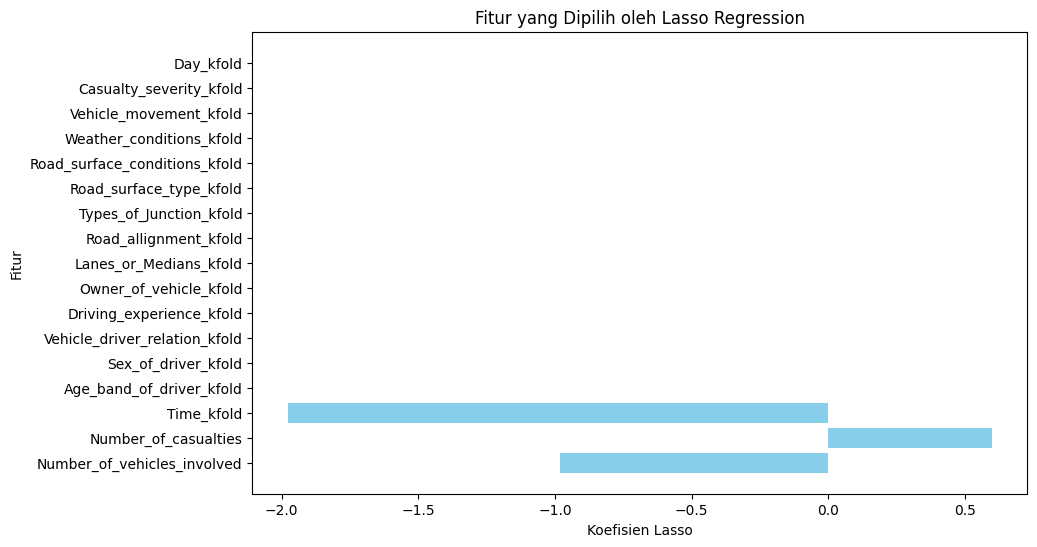

In [51]:
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
lasso.fit(X_train_kfold, y_train_kfold)

model = SelectFromModel(lasso, prefit=True)
selected_lasso_features = X_train_kfold.columns[model.get_support()].tolist()

print("Fitur yang dipilih oleh Lasso:")
print(selected_lasso_features)

coefficients = lasso.coef_[0]

selected_coefficients = coefficients[[X_train_kfold.columns.get_loc(f) for f in selected_lasso_features]]

plt.figure(figsize=(10, 6))
plt.barh(selected_lasso_features, selected_coefficients, color='skyblue')
plt.xlabel('Koefisien Lasso')
plt.ylabel('Fitur')
plt.title('Fitur yang Dipilih oleh Lasso Regression')
plt.show()


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

target_column = 'Accident_severity'
corr_matrix = df_mix.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_mix = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_mix.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_mix, y_train_mix)
selected_features_rfe_mix = X_train_mix.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_mix = pca.fit_transform(X_train_mix)
X_test_pca_mix = pca.transform(X_test_mix)

len(selected_features_corr_mix), len(selected_features_rfe_mix), len(selected_features_lasso_mix), X_train_pca_mix.shape[1]


(2, 10, 24, 10)

Fitur yang dipilih berdasarkan korelasi: 2
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 24
Jumlah komponen PCA: 10


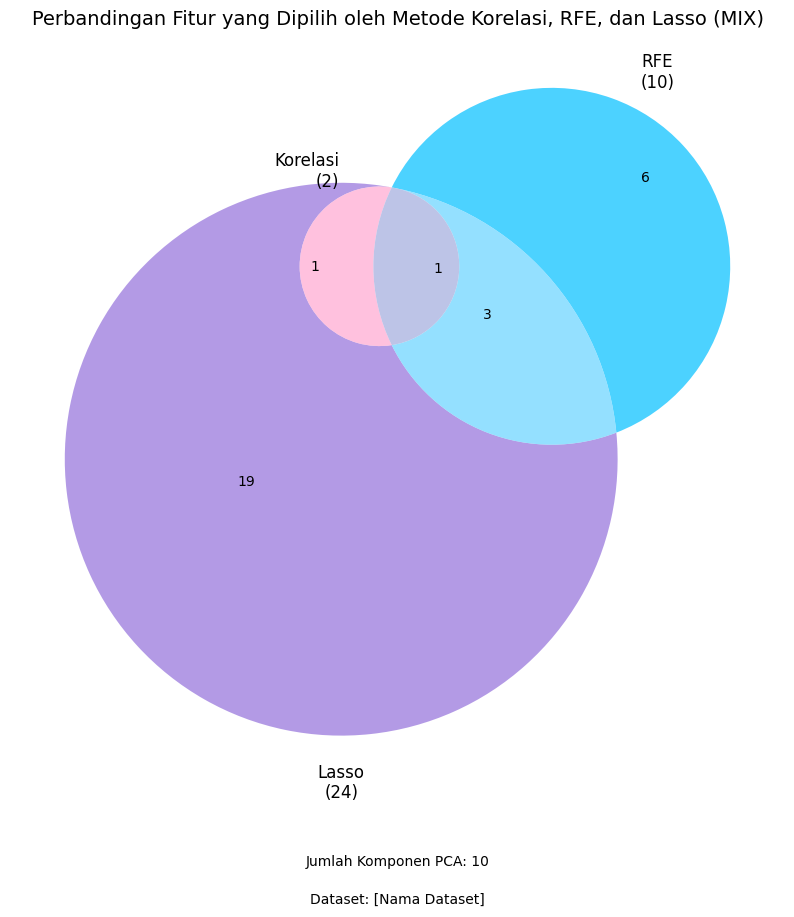

In [64]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_mix)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_mix)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_mix)}")
print(f"Jumlah komponen PCA: {X_train_pca_mix.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_mix) - set(selected_features_rfe_mix) - set(selected_features_lasso_mix)),
    '010': len(set(selected_features_rfe_mix) - set(selected_features_corr_mix) - set(selected_features_lasso_mix)),
    '001': len(set(selected_features_lasso_mix) - set(selected_features_corr_mix) - set(selected_features_rfe_mix)),
    '110': len(set(selected_features_corr_mix) & set(selected_features_rfe_mix) - set(selected_features_lasso_mix)),
    '101': len(set(selected_features_corr_mix) & set(selected_features_lasso_mix) - set(selected_features_rfe_mix)),
    '011': len(set(selected_features_rfe_mix) & set(selected_features_lasso_mix) - set(selected_features_corr_mix)),
    '111': len(set(selected_features_corr_mix) & set(selected_features_rfe_mix) & set(selected_features_lasso_mix))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_mix)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_mix)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_mix)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (MIX)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_mix.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    return f1, cv_scores

# 1. Model dengan Semua Fitur
# Random Forest
rf_model_all_mix = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_mix, rf_cv_all_mix = evaluate_model(rf_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

# XGBoost
xgb_model_all_mix = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_mix, xgb_cv_all_mix = evaluate_model(xgb_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

# Logistic Regression
lr_model_all_mix = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_mix, lr_cv_all_mix = evaluate_model(lr_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

# KNeighborsClassifier
knn_model_all_mix = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_mix, knn_cv_all_mix = evaluate_model(knn_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

# Extra Trees Classifier
et_model_all_mix = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_mix, et_cv_all_mix = evaluate_model(et_model_all_mix, X_train_mix, X_test_mix, y_train_mix, y_test_mix)

# 2. Model dengan RFE
rf_rfe_mix = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_mix = RFE(rf_rfe_mix, n_features_to_select=10)
rfe_mix.fit(X_train_mix, y_train_mix)
selected_features_rfe_mix = X_train_mix.columns[rfe_mix.support_].tolist()
X_train_rfe_mix = X_train_mix[selected_features_rfe_mix]
X_test_rfe_mix = X_test_mix[selected_features_rfe_mix]

# Evaluasi model RFE dengan setiap model
rf_f1_rfe_mix, rf_cv_rfe_mix = evaluate_model(rf_rfe_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
xgb_f1_rfe_mix, xgb_cv_rfe_mix = evaluate_model(xgb_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
lr_f1_rfe_mix, lr_cv_rfe_mix = evaluate_model(lr_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
knn_f1_rfe_mix, knn_cv_rfe_mix = evaluate_model(knn_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)
et_f1_rfe_mix, et_cv_rfe_mix = evaluate_model(et_model_all_mix, X_train_rfe_mix, X_test_rfe_mix, y_train_mix, y_test_mix)

# 3. Model dengan Lasso
lasso_mix = LassoCV(cv=5, random_state=42).fit(X_train_mix, y_train_mix)
model_lasso_mix = SelectFromModel(lasso_mix, prefit=True)
selected_features_lasso_mix = X_train_mix.columns[model_lasso_mix.get_support()].tolist()
X_train_lasso_mix = X_train_mix[selected_features_lasso_mix]
X_test_lasso_mix = X_test_mix[selected_features_lasso_mix]

# Evaluasi model Lasso dengan setiap model
rf_f1_lasso_mix, rf_cv_lasso_mix = evaluate_model(rf_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
xgb_f1_lasso_mix, xgb_cv_lasso_mix = evaluate_model(xgb_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
lr_f1_lasso_mix, lr_cv_lasso_mix = evaluate_model(lr_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
knn_f1_lasso_mix, knn_cv_lasso_mix = evaluate_model(knn_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)
et_f1_lasso_mix, et_cv_lasso_mix = evaluate_model(et_model_all_mix, X_train_lasso_mix, X_test_lasso_mix, y_train_mix, y_test_mix)

# 4. Model dengan PCA
pca_mix = PCA(n_components=10)
X_train_pca_mix = pca_mix.fit_transform(X_train_mix)
X_test_pca_mix = pca_mix.transform(X_test_mix)

# Evaluasi model PCA dengan setiap model
rf_f1_pca_mix, rf_cv_pca_mix = evaluate_model(rf_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
xgb_f1_pca_mix, xgb_cv_pca_mix = evaluate_model(xgb_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
lr_f1_pca_mix, lr_cv_pca_mix = evaluate_model(lr_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
knn_f1_pca_mix, knn_cv_pca_mix = evaluate_model(knn_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)
et_f1_pca_mix, et_cv_pca_mix = evaluate_model(et_model_all_mix, X_train_pca_mix, X_test_pca_mix, y_train_mix, y_test_mix)

# Menampilkan hasil evaluasi untuk Semua Fitur
print("\nHasil Evaluasi Model dengan Semua Fitur:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_mix:.4f}, Cross-Validation F1 Score: {rf_cv_all_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_all_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_mix:.4f}, Cross-Validation F1 Score: {lr_cv_all_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_mix:.4f}, Cross-Validation F1 Score: {knn_cv_all_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_mix:.4f}, Cross-Validation F1 Score: {et_cv_all_mix:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk RFE
print("\nHasil Evaluasi Model dengan RFE:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_mix:.4f}, Cross-Validation F1 Score: {et_cv_rfe_mix:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk Lasso
print("\nHasil Evaluasi Model dengan Lasso:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_mix:.4f}, Cross-Validation F1 Score: {et_cv_lasso_mix:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk PCA
print("\nHasil Evaluasi Model dengan PCA:")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_mix:.4f}, Cross-Validation F1 Score: {rf_cv_pca_mix:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_mix:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_mix:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_mix:.4f}, Cross-Validation F1 Score: {lr_cv_pca_mix:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_mix:.4f}, Cross-Validation F1 Score: {knn_cv_pca_mix:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_mix:.4f}, Cross-Validation F1 Score: {et_cv_pca_mix:.4f}")
print("------------------------------------------------\n")


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:42:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:43:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data F1 score dan Cross-Validation F1 score untuk Semua Fitur, RFE, Lasso, dan PCA
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features', 'RFE', 'Lasso', 'PCA']

# F1 Scores
f1_scores = {
    'Random Forest': [rf_f1_all_mix, rf_f1_rfe_mix, rf_f1_lasso_mix, rf_f1_pca_mix],
    'XGBoost': [xgb_f1_all_mix, xgb_f1_rfe_mix, xgb_f1_lasso_mix, xgb_f1_pca_mix],
    'Logistic Regression': [lr_f1_all_mix, lr_f1_rfe_mix, lr_f1_lasso_mix, lr_f1_pca_mix],
    'KNN': [knn_f1_all_mix, knn_f1_rfe_mix, knn_f1_lasso_mix, knn_f1_pca_mix],
    'Extra Trees': [et_f1_all_mix, et_f1_rfe_mix, et_f1_lasso_mix, et_f1_pca_mix],
}

# Cross-Validation F1 Scores
cv_scores = {
    'Random Forest': [rf_cv_all_mix, rf_cv_rfe_mix, rf_cv_lasso_mix, rf_cv_pca_mix],
    'XGBoost': [xgb_cv_all_mix, xgb_cv_rfe_mix, xgb_cv_lasso_mix, xgb_cv_pca_mix],
    'Logistic Regression': [lr_cv_all_mix, lr_cv_rfe_mix, lr_cv_lasso_mix, lr_cv_pca_mix],
    'KNN': [knn_cv_all_mix, knn_cv_rfe_mix, knn_cv_lasso_mix, knn_cv_pca_mix],
    'Extra Trees': [et_cv_all_mix, et_cv_rfe_mix, et_cv_lasso_mix, et_cv_pca_mix],
}

# Plotting
x = np.arange(len(features))  # Label positions for the x-axis

fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Create two subplots for F1 scores and CV scores

# Plot F1 Scores
for idx, model in enumerate(models):
    ax[0].bar(x + idx * 0.15, f1_scores[model], width=0.15, label=model)

# Plot Cross-Validation F1 Scores
for idx, model in enumerate(models):
    ax[1].bar(x + idx * 0.15, cv_scores[model], width=0.15, label=model)

# Customizing the plots
ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(features)
ax[0].set_title('F1 Scores for Different Feature Selection Techniques')
ax[0].set_ylabel('F1 Score')
ax[0].legend()

ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(features)
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques')
ax[1].set_ylabel('Cross-Validation F1 Score')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


In [57]:
target_column = 'Accident_severity'
corr_matrix = df_ohe.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_ohe = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_ohe.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_ohe, y_train_ohe)
selected_features_rfe_ohe = X_train_ohe.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_ohe)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_ohe = pca.fit_transform(X_train_ohe)
X_test_pca_ohe = pca.transform(X_test_ohe)

len(selected_features_corr_ohe), len(selected_features_rfe_ohe), len(selected_features_lasso_ohe), X_train_pca_ohe.shape[1]

(2, 10, 44, 10)

Fitur yang dipilih berdasarkan korelasi: 2
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 44
Jumlah komponen PCA: 10


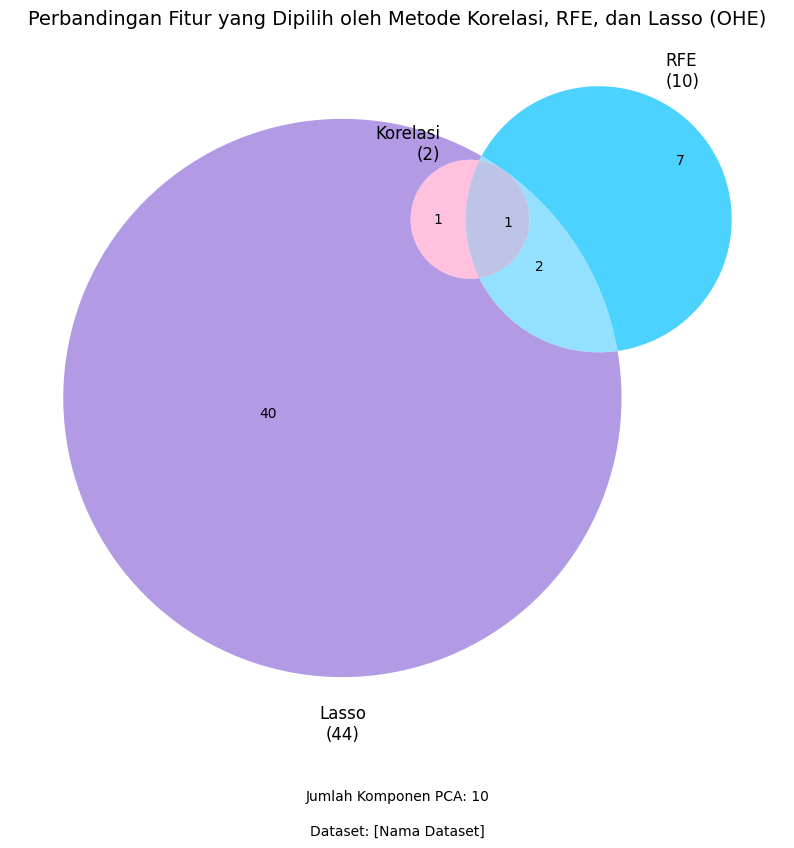

In [63]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_ohe)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_ohe)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_ohe)}")
print(f"Jumlah komponen PCA: {X_train_pca_ohe.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_ohe) - set(selected_features_rfe_ohe) - set(selected_features_lasso_ohe)),
    '010': len(set(selected_features_rfe_ohe) - set(selected_features_corr_ohe) - set(selected_features_lasso_ohe)),
    '001': len(set(selected_features_lasso_ohe) - set(selected_features_corr_ohe) - set(selected_features_rfe_ohe)),
    '110': len(set(selected_features_corr_ohe) & set(selected_features_rfe_ohe) - set(selected_features_lasso_ohe)),
    '101': len(set(selected_features_corr_ohe) & set(selected_features_lasso_ohe) - set(selected_features_rfe_ohe)),
    '011': len(set(selected_features_rfe_ohe) & set(selected_features_lasso_ohe) - set(selected_features_corr_ohe)),
    '111': len(set(selected_features_corr_ohe) & set(selected_features_rfe_ohe) & set(selected_features_lasso_ohe))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_ohe)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_ohe)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_ohe)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (OHE)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_ohe.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
    return f1, cv_scores

# 1. Model dengan Semua Fitur
# Random Forest
rf_model_all_ohe = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_ohe, rf_cv_all_ohe = evaluate_model(rf_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

# XGBoost
xgb_model_all_ohe = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_ohe, xgb_cv_all_ohe = evaluate_model(xgb_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

# Logistic Regression
lr_model_all_ohe = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_ohe, lr_cv_all_ohe = evaluate_model(lr_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

# KNeighborsClassifier
knn_model_all_ohe = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_ohe, knn_cv_all_ohe = evaluate_model(knn_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

# Extra Trees Classifier
et_model_all_ohe = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_ohe, et_cv_all_ohe = evaluate_model(et_model_all_ohe, X_train_ohe, X_test_ohe, y_train_mix, y_test_mix)

# 2. Model dengan RFE
rf_rfe_ohe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_ohe = RFE(rf_rfe_ohe, n_features_to_select=10)
rfe_ohe.fit(X_train_ohe, y_train_mix)
selected_features_rfe_ohe = X_train_ohe.columns[rfe_ohe.support_].tolist()
X_train_rfe_ohe = X_train_ohe[selected_features_rfe_ohe]
X_test_rfe_ohe = X_test_ohe[selected_features_rfe_ohe]

# Evaluasi model RFE dengan setiap model
rf_f1_rfe_ohe, rf_cv_rfe_ohe = evaluate_model(rf_rfe_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
xgb_f1_rfe_ohe, xgb_cv_rfe_ohe = evaluate_model(xgb_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
lr_f1_rfe_ohe, lr_cv_rfe_ohe = evaluate_model(lr_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
knn_f1_rfe_ohe, knn_cv_rfe_ohe = evaluate_model(knn_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)
et_f1_rfe_ohe, et_cv_rfe_ohe = evaluate_model(et_model_all_ohe, X_train_rfe_ohe, X_test_rfe_ohe, y_train_mix, y_test_mix)

# 3. Model dengan Lasso
lasso_ohe = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_mix)
model_lasso_ohe = SelectFromModel(lasso_ohe, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model_lasso_ohe.get_support()].tolist()
X_train_lasso_ohe = X_train_ohe[selected_features_lasso_ohe]
X_test_lasso_ohe = X_test_ohe[selected_features_lasso_ohe]

# Evaluasi model Lasso dengan setiap model
rf_f1_lasso_ohe, rf_cv_lasso_ohe = evaluate_model(rf_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
xgb_f1_lasso_ohe, xgb_cv_lasso_ohe = evaluate_model(xgb_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
lr_f1_lasso_ohe, lr_cv_lasso_ohe = evaluate_model(lr_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
knn_f1_lasso_ohe, knn_cv_lasso_ohe = evaluate_model(knn_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)
et_f1_lasso_ohe, et_cv_lasso_ohe = evaluate_model(et_model_all_ohe, X_train_lasso_ohe, X_test_lasso_ohe, y_train_mix, y_test_mix)

# 4. Model dengan PCA
pca_ohe = PCA(n_components=10)
X_train_pca_ohe = pca_ohe.fit_transform(X_train_ohe)
X_test_pca_ohe = pca_ohe.transform(X_test_ohe)

# Evaluasi model PCA dengan setiap model
rf_f1_pca_ohe, rf_cv_pca_ohe = evaluate_model(rf_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
xgb_f1_pca_ohe, xgb_cv_pca_ohe = evaluate_model(xgb_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
lr_f1_pca_ohe, lr_cv_pca_ohe = evaluate_model(lr_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
knn_f1_pca_ohe, knn_cv_pca_ohe = evaluate_model(knn_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)
et_f1_pca_ohe, et_cv_pca_ohe = evaluate_model(et_model_all_ohe, X_train_pca_ohe, X_test_pca_ohe, y_train_mix, y_test_mix)

# Menampilkan hasil evaluasi untuk Semua Fitur (OHE)
print("\nHasil Evaluasi Model dengan Semua Fitur (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_all_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_all_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_all_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_all_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_ohe:.4f}, Cross-Validation F1 Score: {et_cv_all_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk RFE (OHE)
print("\nHasil Evaluasi Model dengan RFE (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {et_cv_rfe_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk Lasso (OHE)
print("\nHasil Evaluasi Model dengan Lasso (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {et_cv_lasso_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk PCA (OHE)
print("\nHasil Evaluasi Model dengan PCA (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_pca_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_pca_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_pca_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {et_cv_pca_ohe:.4f}")
print("------------------------------------------------\n")


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data F1 score dan Cross-Validation F1 score untuk Semua Fitur (OHE), RFE, Lasso, dan PCA
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features (OHE)', 'RFE', 'Lasso', 'PCA']

# F1 Scores
f1_scores_ohe = {
    'Random Forest': [rf_f1_all_ohe, rf_f1_rfe_ohe, rf_f1_lasso_ohe, rf_f1_pca_ohe],
    'XGBoost': [xgb_f1_all_ohe, xgb_f1_rfe_ohe, xgb_f1_lasso_ohe, xgb_f1_pca_ohe],
    'Logistic Regression': [lr_f1_all_ohe, lr_f1_rfe_ohe, lr_f1_lasso_ohe, lr_f1_pca_ohe],
    'KNN': [knn_f1_all_ohe, knn_f1_rfe_ohe, knn_f1_lasso_ohe, knn_f1_pca_ohe],
    'Extra Trees': [et_f1_all_ohe, et_f1_rfe_ohe, et_f1_lasso_ohe, et_f1_pca_ohe],
}

# Cross-Validation F1 Scores
cv_scores_ohe = {
    'Random Forest': [rf_cv_all_ohe, rf_cv_rfe_ohe, rf_cv_lasso_ohe, rf_cv_pca_ohe],
    'XGBoost': [xgb_cv_all_ohe, xgb_cv_rfe_ohe, xgb_cv_lasso_ohe, xgb_cv_pca_ohe],
    'Logistic Regression': [lr_cv_all_ohe, lr_cv_rfe_ohe, lr_cv_lasso_ohe, lr_cv_pca_ohe],
    'KNN': [knn_cv_all_ohe, knn_cv_rfe_ohe, knn_cv_lasso_ohe, knn_cv_pca_ohe],
    'Extra Trees': [et_cv_all_ohe, et_cv_rfe_ohe, et_cv_lasso_ohe, et_cv_pca_ohe],
}

# Plotting
x = np.arange(len(features))  # Label positions for the x-axis

fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Create two subplots for F1 scores and CV scores

# Plot F1 Scores
for idx, model in enumerate(models):
    ax[0].bar(x + idx * 0.15, f1_scores_ohe[model], width=0.15, label=model)

# Plot Cross-Validation F1 Scores
for idx, model in enumerate(models):
    ax[1].bar(x + idx * 0.15, cv_scores_ohe[model], width=0.15, label=model)

# Customizing the plots
ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(features)
ax[0].set_title('F1 Scores for Different Feature Selection Techniques (OHE)')
ax[0].set_ylabel('F1 Score')
ax[0].legend()

ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(features)
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques (OHE)')
ax[1].set_ylabel('Cross-Validation F1 Score')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


In [58]:
target_column = 'Accident_severity'
corr_matrix = df_kfold.corr()
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
selected_features_corr_kfold = target_corr[target_corr > 0.05].index.tolist()
selected_features_corr_kfold.remove(target_column)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=10)
rfe.fit(X_train_kfold, y_train_kfold)
selected_features_rfe_kfold = X_train_kfold.columns[rfe.support_].tolist()

lasso = LassoCV(cv=5, random_state=42).fit(X_train_kfold, y_train_kfold)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso_kfold = X_train_kfold.columns[model.get_support()].tolist()

pca = PCA(n_components=10)
X_train_pca_kfold = pca.fit_transform(X_train_kfold)
X_test_pca_kfold = pca.transform(X_test_kfold)

len(selected_features_corr_kfold), len(selected_features_rfe_kfold), len(selected_features_lasso_kfold), X_train_pca_kfold.shape[1]

(4, 10, 19, 10)

Fitur yang dipilih berdasarkan korelasi: 4
Fitur yang dipilih dengan RFE: 10
Fitur yang dipilih dengan Lasso: 19
Jumlah komponen PCA: 10


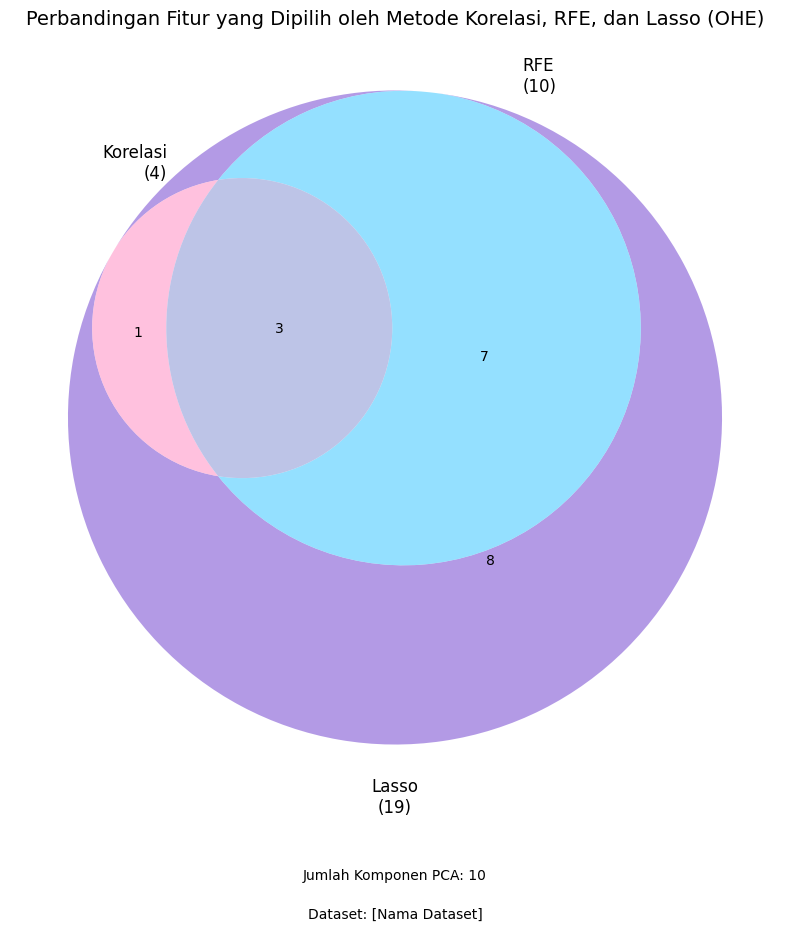

In [65]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

print(f"Fitur yang dipilih berdasarkan korelasi: {len(selected_features_corr_kfold)}")
print(f"Fitur yang dipilih dengan RFE: {len(selected_features_rfe_kfold)}")
print(f"Fitur yang dipilih dengan Lasso: {len(selected_features_lasso_kfold)}")
print(f"Jumlah komponen PCA: {X_train_pca_kfold.shape[1]}")

venn_labels = {
    '100': len(set(selected_features_corr_kfold) - set(selected_features_rfe_kfold) - set(selected_features_lasso_kfold)),
    '010': len(set(selected_features_rfe_kfold) - set(selected_features_corr_kfold) - set(selected_features_lasso_kfold)),
    '001': len(set(selected_features_lasso_kfold) - set(selected_features_corr_kfold) - set(selected_features_rfe_kfold)),
    '110': len(set(selected_features_corr_kfold) & set(selected_features_rfe_kfold) - set(selected_features_lasso_kfold)),
    '101': len(set(selected_features_corr_kfold) & set(selected_features_lasso_kfold) - set(selected_features_rfe_kfold)),
    '011': len(set(selected_features_rfe_kfold) & set(selected_features_lasso_kfold) - set(selected_features_corr_kfold)),
    '111': len(set(selected_features_corr_kfold) & set(selected_features_rfe_kfold) & set(selected_features_lasso_kfold))
}

plt.figure(figsize=(10, 10))
v = venn3(subsets=venn_labels, set_labels=('Korelasi', 'RFE', 'Lasso'), alpha=0.7,
          set_colors=('coral', 'deepskyblue', 'mediumpurple'))  

if v.set_labels:
    v.set_labels[0].set_text(f"Korelasi\n({len(selected_features_corr_kfold)})")
    v.set_labels[1].set_text(f"RFE\n({len(selected_features_rfe_kfold)})")
    v.set_labels[2].set_text(f"Lasso\n({len(selected_features_lasso_kfold)})")

plt.title('Perbandingan Fitur yang Dipilih oleh Metode Korelasi, RFE, dan Lasso (OHE)', fontsize=14)
plt.annotate(f"Jumlah Komponen PCA: {X_train_pca_kfold.shape[1]}", xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)
plt.annotate("Dataset: [Nama Dataset]", xy=(0.5, -0.15), xycoords='axes fraction', ha='center', fontsize=10)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Fungsi untuk mengevaluasi model dengan K-Fold Cross-Validation dan F1 Score
def evaluate_model_kfold(model, X_train, y_train, X_test, y_test, cv=5):
    # Fit the model to the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the F1 Score for the test set
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation with K-Fold
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    return f1, np.mean(cv_scores)

# 1. Model dengan Semua Fitur
# Random Forest
rf_model_all_ohe = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_f1_all_ohe, rf_cv_all_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_ohe, y_train_mix, X_test_ohe, y_test_mix)

# XGBoost
xgb_model_all_ohe = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_f1_all_ohe, xgb_cv_all_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_ohe, y_train_mix, X_test_ohe, y_test_mix)

# Logistic Regression
lr_model_all_ohe = LogisticRegression(max_iter=1000, random_state=42)
lr_f1_all_ohe, lr_cv_all_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_ohe, y_train_mix, X_test_ohe, y_test_mix)

# KNeighborsClassifier
knn_model_all_ohe = KNeighborsClassifier(n_neighbors=5)
knn_f1_all_ohe, knn_cv_all_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_ohe, y_train_mix, X_test_ohe, y_test_mix)

# Extra Trees Classifier
et_model_all_ohe = ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced')
et_f1_all_ohe, et_cv_all_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_ohe, y_train_mix, X_test_ohe, y_test_mix)

# 2. Model dengan RFE
rf_rfe_ohe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_ohe = RFE(rf_rfe_ohe, n_features_to_select=10)
rfe_ohe.fit(X_train_ohe, y_train_mix)
selected_features_rfe_ohe = X_train_ohe.columns[rfe_ohe.support_].tolist()
X_train_rfe_ohe = X_train_ohe[selected_features_rfe_ohe]
X_test_rfe_ohe = X_test_ohe[selected_features_rfe_ohe]

# Evaluasi model RFE dengan K-Fold Cross-Validation
rf_f1_rfe_ohe, rf_cv_rfe_ohe = evaluate_model_kfold(rf_rfe_ohe, X_train_rfe_ohe, y_train_mix, X_test_rfe_ohe, y_test_mix)
xgb_f1_rfe_ohe, xgb_cv_rfe_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_rfe_ohe, y_train_mix, X_test_rfe_ohe, y_test_mix)
lr_f1_rfe_ohe, lr_cv_rfe_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_rfe_ohe, y_train_mix, X_test_rfe_ohe, y_test_mix)
knn_f1_rfe_ohe, knn_cv_rfe_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_rfe_ohe, y_train_mix, X_test_rfe_ohe, y_test_mix)
et_f1_rfe_ohe, et_cv_rfe_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_rfe_ohe, y_train_mix, X_test_rfe_ohe, y_test_mix)

# 3. Model dengan Lasso
lasso_ohe = LassoCV(cv=5, random_state=42).fit(X_train_ohe, y_train_mix)
model_lasso_ohe = SelectFromModel(lasso_ohe, prefit=True)
selected_features_lasso_ohe = X_train_ohe.columns[model_lasso_ohe.get_support()].tolist()
X_train_lasso_ohe = X_train_ohe[selected_features_lasso_ohe]
X_test_lasso_ohe = X_test_ohe[selected_features_lasso_ohe]

# Evaluasi model Lasso dengan K-Fold Cross-Validation
rf_f1_lasso_ohe, rf_cv_lasso_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test_mix)
xgb_f1_lasso_ohe, xgb_cv_lasso_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test_mix)
lr_f1_lasso_ohe, lr_cv_lasso_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test_mix)
knn_f1_lasso_ohe, knn_cv_lasso_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test_mix)
et_f1_lasso_ohe, et_cv_lasso_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_lasso_ohe, y_train_mix, X_test_lasso_ohe, y_test_mix)

# 4. Model dengan PCA
pca_ohe = PCA(n_components=10)
X_train_pca_ohe = pca_ohe.fit_transform(X_train_ohe)
X_test_pca_ohe = pca_ohe.transform(X_test_ohe)

# Evaluasi model PCA dengan K-Fold Cross-Validation
rf_f1_pca_ohe, rf_cv_pca_ohe = evaluate_model_kfold(rf_model_all_ohe, X_train_pca_ohe, y_train_mix, X_test_pca_ohe, y_test_mix)
xgb_f1_pca_ohe, xgb_cv_pca_ohe = evaluate_model_kfold(xgb_model_all_ohe, X_train_pca_ohe, y_train_mix, X_test_pca_ohe, y_test_mix)
lr_f1_pca_ohe, lr_cv_pca_ohe = evaluate_model_kfold(lr_model_all_ohe, X_train_pca_ohe, y_train_mix, X_test_pca_ohe, y_test_mix)
knn_f1_pca_ohe, knn_cv_pca_ohe = evaluate_model_kfold(knn_model_all_ohe, X_train_pca_ohe, y_train_mix, X_test_pca_ohe, y_test_mix)
et_f1_pca_ohe, et_cv_pca_ohe = evaluate_model_kfold(et_model_all_ohe, X_train_pca_ohe, y_train_mix, X_test_pca_ohe, y_test_mix)

# Menampilkan hasil evaluasi untuk Semua Fitur (OHE)
print("\nHasil Evaluasi Model dengan Semua Fitur (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_all_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_all_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_all_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_all_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_all_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_all_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_all_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_all_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_all_ohe:.4f}, Cross-Validation F1 Score: {et_cv_all_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk RFE (OHE)
print("\nHasil Evaluasi Model dengan RFE (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_rfe_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_rfe_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_rfe_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_rfe_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_rfe_ohe:.4f}, Cross-Validation F1 Score: {et_cv_rfe_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk Lasso (OHE)
print("\nHasil Evaluasi Model dengan Lasso (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_lasso_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_lasso_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_lasso_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_lasso_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_lasso_ohe:.4f}, Cross-Validation F1 Score: {et_cv_lasso_ohe:.4f}")
print("------------------------------------------------\n")

# Menampilkan hasil evaluasi untuk PCA (OHE)
print("\nHasil Evaluasi Model dengan PCA (OHE):")
print("------------------------------------------------")
print(f"Random Forest - F1 Score: {rf_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {rf_cv_pca_ohe:.4f}")
print(f"XGBoost - F1 Score: {xgb_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {xgb_cv_pca_ohe:.4f}")
print(f"Logistic Regression - F1 Score: {lr_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {lr_cv_pca_ohe:.4f}")
print(f"KNN - F1 Score: {knn_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {knn_cv_pca_ohe:.4f}")
print(f"Extra Trees - F1 Score: {et_f1_pca_ohe:.4f}, Cross-Validation F1 Score: {et_cv_pca_ohe:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data F1 score dan Cross-Validation F1 score untuk Semua Fitur (K-Fold), RFE, Lasso, dan PCA
models = ['Random Forest', 'XGBoost', 'Logistic Regression', 'KNN', 'Extra Trees']
features = ['All Features (OHE)', 'RFE (OHE)', 'Lasso (OHE)', 'PCA (OHE)']

# F1 Scores (K-Fold)
f1_scores_kfold = {
    'Random Forest': [rf_f1_all_ohe, rf_f1_rfe_ohe, rf_f1_lasso_ohe, rf_f1_pca_ohe],
    'XGBoost': [xgb_f1_all_ohe, xgb_f1_rfe_ohe, xgb_f1_lasso_ohe, xgb_f1_pca_ohe],
    'Logistic Regression': [lr_f1_all_ohe, lr_f1_rfe_ohe, lr_f1_lasso_ohe, lr_f1_pca_ohe],
    'KNN': [knn_f1_all_ohe, knn_f1_rfe_ohe, knn_f1_lasso_ohe, knn_f1_pca_ohe],
    'Extra Trees': [et_f1_all_ohe, et_f1_rfe_ohe, et_f1_lasso_ohe, et_f1_pca_ohe],
}

# Cross-Validation F1 Scores (K-Fold)
cv_scores_kfold = {
    'Random Forest': [rf_cv_all_ohe, rf_cv_rfe_ohe, rf_cv_lasso_ohe, rf_cv_pca_ohe],
    'XGBoost': [xgb_cv_all_ohe, xgb_cv_rfe_ohe, xgb_cv_lasso_ohe, xgb_cv_pca_ohe],
    'Logistic Regression': [lr_cv_all_ohe, lr_cv_rfe_ohe, lr_cv_lasso_ohe, lr_cv_pca_ohe],
    'KNN': [knn_cv_all_ohe, knn_cv_rfe_ohe, knn_cv_lasso_ohe, knn_cv_pca_ohe],
    'Extra Trees': [et_cv_all_ohe, et_cv_rfe_ohe, et_cv_lasso_ohe, et_cv_pca_ohe],
}

# Plotting
x = np.arange(len(features))  # Label positions for the x-axis

fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Create two subplots for F1 scores and CV scores

# Plot F1 Scores (K-Fold)
for idx, model in enumerate(models):
    ax[0].bar(x + idx * 0.15, f1_scores_kfold[model], width=0.15, label=model)

# Plot Cross-Validation F1 Scores (K-Fold)
for idx, model in enumerate(models):
    ax[1].bar(x + idx * 0.15, cv_scores_kfold[model], width=0.15, label=model)

# Customizing the plots
ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(features)
ax[0].set_title('F1 Scores for Different Feature Selection Techniques (OHE)')
ax[0].set_ylabel('F1 Score')
ax[0].legend()

ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(features)
ax[1].set_title('Cross-Validation F1 Scores for Different Feature Selection Techniques (OHE)')
ax[1].set_ylabel('Cross-Validation F1 Score')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
# model_xgb = XGBClassifier(scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1], 
#                           use_label_encoder=False, eval_metric="logloss", random_state=42)

# def evaluate_xgb(X_train_sel, X_test_sel):
#     model_xgb.fit(X_train_sel, y_train)
#     y_pred = model_xgb.predict(X_test_sel)
#     return accuracy_score(y_test, y_pred)

# acc_all_features_xgb = evaluate_xgb(X_train, X_test)
# acc_corr_xgb = evaluate_xgb(X_train[selected_features_corr], X_test[selected_features_corr])
# acc_rfe_xgb = evaluate_xgb(X_train[selected_features_rfe], X_test[selected_features_rfe])
# acc_lasso_xgb = evaluate_xgb(X_train[selected_features_lasso], X_test[selected_features_lasso])
# acc_pca_xgb = evaluate_xgb(X_train_pca, X_test_pca)

# acc_all_features_xgb ,acc_corr_xgb, acc_rfe_xgb, acc_lasso_xgb, acc_pca_xgb


(0.8491869918699188,
 0.8443089430894309,
 0.8414634146341463,
 0.8491869918699188,
 0.8382113821138212)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score


# model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# def evaluate_model(X_train_sel, X_test_sel):
#     model.fit(X_train_sel, y_train)
#     y_pred = model.predict(X_test_sel)
#     return accuracy_score(y_test, y_pred)

# acc_all_features_gradient = evaluate_model(X_train, X_test)
# acc_corr_gradient = evaluate_model(X_train[selected_features_corr], X_test[selected_features_corr])
# acc_rfe_gradient = evaluate_model(X_train[selected_features_rfe], X_test[selected_features_rfe])
# acc_lasso_gradient = evaluate_model(X_train[selected_features_lasso], X_test[selected_features_lasso])
# acc_pca_gradient = evaluate_model(X_train_pca, X_test_pca)

# acc_all_features_gradient, acc_corr_gradient, acc_rfe_gradient, acc_lasso_gradient, acc_pca_gradient


(0.8491869918699188,
 0.8471544715447155,
 0.8455284552845529,
 0.8475609756097561,
 0.8471544715447155)

In [ ]:
/

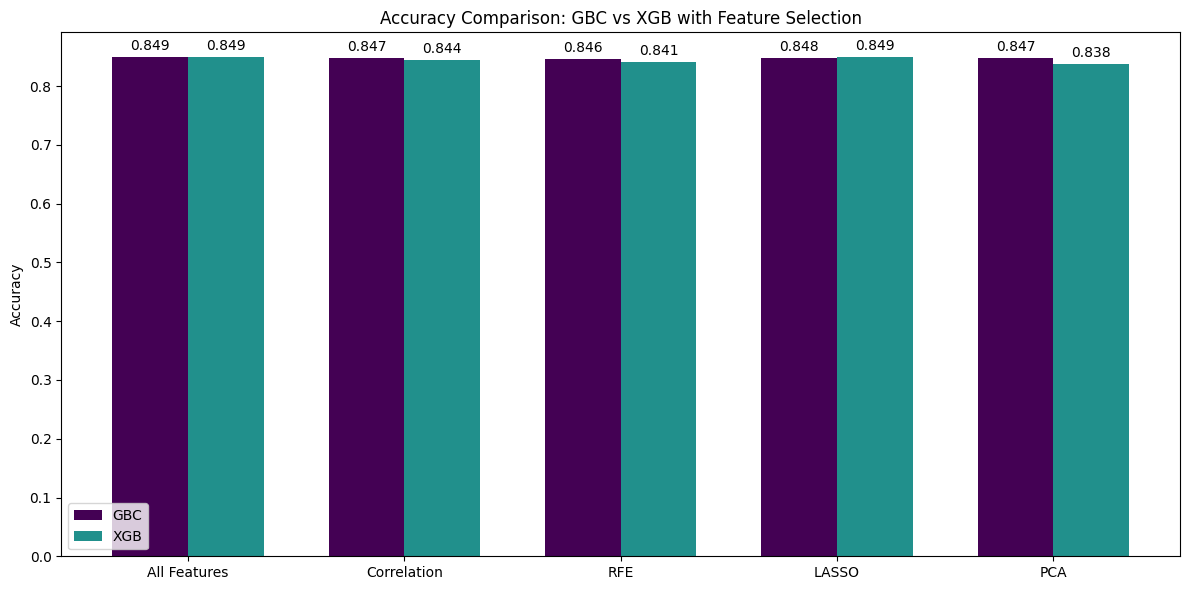

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# gbc_accuracies = [acc_all_features_gradient, acc_corr_gradient, acc_rfe_gradient, acc_lasso_gradient, acc_pca_gradient]
# xgb_accuracies = [acc_all_features_xgb, acc_corr_xgb, acc_rfe_xgb, acc_lasso_xgb, acc_pca_xgb]

# feature_selection_methods = ['All Features', 'Correlation', 'RFE', 'LASSO', 'PCA']

# x = np.arange(len(feature_selection_methods))
# width = 0.35

# fig, ax = plt.subplots(figsize=(12, 6))
# rects1 = ax.bar(x - width/2, gbc_accuracies, width, label='GBC', color="#440154") # Warna GBC diubah
# rects2 = ax.bar(x + width/2, xgb_accuracies, width, label='XGB', color="#21908c") # Warna XGB diubah

# ax.set_ylabel('Accuracy')
# ax.set_title('Accuracy Comparison: GBC vs XGB with Feature Selection')
# ax.set_xticks(x)
# ax.set_xticklabels(feature_selection_methods)
# ax.legend()

# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(round(height, 3)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# fig.tight_layout()
# plt.show()

In [ ]:
# def evaluate_model(X_train_sel, X_test_sel):
#     model.fit(X_train_sel, y_train)
#     y_pred = model.predict(X_test_sel)
#     return accuracy_score(y_test, y_pred)

# acc_corr = evaluate_model(X_train[selected_features_corr], X_test[selected_features_corr])
# acc_rfe = evaluate_model(X_train[selected_features_rfe], X_test[selected_features_rfe])
# acc_lasso = evaluate_model(X_train[selected_features_lasso], X_test[selected_features_lasso])
# acc_pca = evaluate_model(X_train_pca, X_test_pca)

# # Menampilkan hasil akurasi
# acc_corr, acc_rfe, acc_lasso, acc_pca


(0.8471544715447155,
 0.8455284552845529,
 0.8475609756097561,
 0.8471544715447155)

# Imbalance data

              precision    recall  f1-score   support

           0       0.05      0.41      0.09        32
           1       0.18      0.45      0.26       347
           2       0.88      0.57      0.69      2080

    accuracy                           0.55      2459
   macro avg       0.37      0.48      0.35      2459
weighted avg       0.77      0.55      0.62      2459

Train Loss: 0.9176
Validation Loss: 0.9519


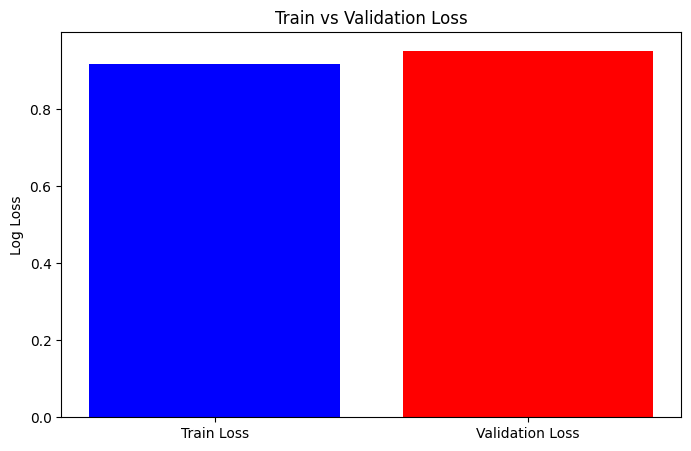

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, log_loss
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# **Step 1: Pisahkan fitur dan target**
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# **Step 2: Split data**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Step 3: Model Balanced Bagging**
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# **Step 3: Model Balanced Bagging**
bbc = BalancedBaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),  # Perbaikan di sini
    sampling_strategy='auto',  # Menyeimbangkan kelas minoritas otomatis
    random_state=42
)

# **Step 4: Training model**
bbc.fit(X_train, y_train)

# **Step 5: Evaluasi model**
y_pred = bbc.predict(X_test)
y_train_proba = bbc.predict_proba(X_train)
y_test_proba = bbc.predict_proba(X_test)

train_loss = log_loss(y_train, y_train_proba)
val_loss = log_loss(y_test, y_test_proba)

print(classification_report(y_test, y_pred))
print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# **Step 6: Plot Loss dan Validation Loss**
plt.figure(figsize=(8, 5))
plt.bar(["Train Loss", "Validation Loss"], [train_loss, val_loss], color=["blue", "red"])
plt.ylabel("Log Loss")
plt.title("Train vs Validation Loss")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Pisahkan fitur dan target
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# **Step 1: Split Data (Test Set Tidak Diubah)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Step 2: Buat Pipeline untuk Resampling di Training Set**
resampling_pipeline = Pipeline([
    ("tomek", TomekLinks()),  # Undersampling Slight Injury (kelas 2)
    ("smote", SMOTE(sampling_strategy={1: 5000, 0: 800}, random_state=42))  # Oversampling Serious (1) & Fatal (0)
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

clf = RandomForestClassifier(class_weight={0: 10, 1: 5, 2: 1}, random_state=42)  # Bobot lebih tinggi ke Fatal Injury
clf.fit(X_train_resampled, y_train_resampled)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Fatal Injury', 'Serious Injury', 'Slight Injury']))


                precision    recall  f1-score   support

  Fatal Injury       1.00      0.03      0.06        32
Serious Injury       0.39      0.05      0.08       347
 Slight Injury       0.85      0.99      0.91      2080

      accuracy                           0.84      2459
     macro avg       0.75      0.36      0.35      2459
  weighted avg       0.79      0.84      0.79      2459



In [ ]:
import numpy as np
import pandas as pd
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Hapus duplikasi sebelum split
df_mix = df_mix.drop_duplicates()

# Pisahkan fitur dan target
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# **Step 1: Split Data (Test Set Tidak Diubah)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Step 2: Resampling Pipeline**
resampling_pipeline = Pipeline([
    ("tomek", TomekLinks()),  # Undersampling Slight Injury (kelas 2) # Slight Injury dikurangi jadi 5000
    ("smote", SMOTE(sampling_strategy={1: 5000, 0: 800}, random_state=42)),  # Serious dan Fatal Injury ditambah
    ("adasyn", ADASYN(sampling_strategy={0: 1000}, random_state=42))  # Tambahan Fatal Injury dengan ADASYN
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# **Step 3: Training Model dengan Cost-Sensitive Learning**
clf = RandomForestClassifier(class_weight="balanced", random_state=42)  # Auto-adjust class weight
clf.fit(X_train_resampled, y_train_resampled)

# **Evaluasi dengan Cross Validation**
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=skf, scoring='f1_macro')
print(f"Cross-validated F1 Score: {np.mean(scores):.4f}")

# **Evaluasi Model**
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Fatal Injury', 'Serious Injury', 'Slight Injury']))



Cross-validated F1 Score: 0.9005
                precision    recall  f1-score   support

  Fatal Injury       1.00      0.03      0.06        32
Serious Injury       0.39      0.06      0.10       347
 Slight Injury       0.85      0.99      0.91      2080

      accuracy                           0.84      2459
     macro avg       0.75      0.36      0.36      2459
  weighted avg       0.79      0.84      0.79      2459



[I 2025-03-06 03:58:43,691] A new study created in memory with name: no-name-1868fc2a-8baa-4a1b-a50f-ce8a4a7c1e5f
[I 2025-03-06 03:59:26,413] Trial 0 finished with value: 0.9118987294936639 and parameters: {'n_estimators': 153, 'max_depth': 38, 'min_samples_split': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.9118987294936639.
[I 2025-03-06 04:00:01,499] Trial 1 finished with value: 0.91204039529828 and parameters: {'n_estimators': 109, 'max_depth': 49, 'min_samples_split': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.91204039529828.
[I 2025-03-06 04:01:00,434] Trial 2 finished with value: 0.9135359891030793 and parameters: {'n_estimators': 175, 'max_depth': 48, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9135359891030793.
[I 2025-03-06 04:02:00,881] Trial 3 finished with value: 0.9129501175198461 and parameters: {'n_estimators': 204, 'max_depth': 26, 'min_samples_split': 2, 'max_features': 'sqrt'}. Best is trial 2 with value

Best Hyperparameters: {'n_estimators': 298, 'max_depth': 27, 'min_samples_split': 5, 'max_features': 'log2'}
Train Loss: 0.1665
Validation Loss: 0.4915


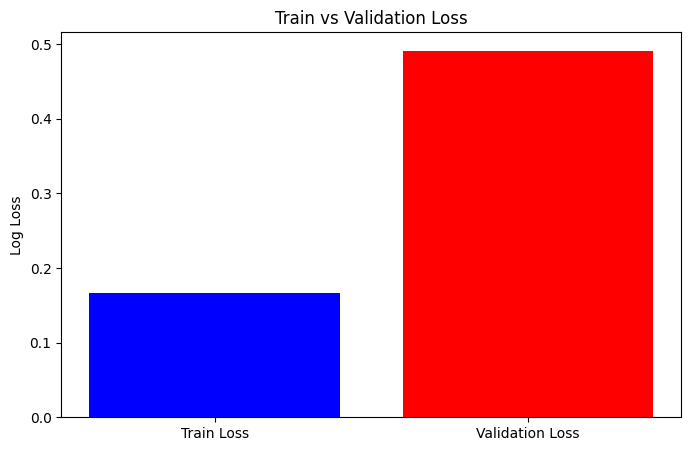

In [ ]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

# Hapus duplikasi sebelum split
df_mix = df_mix.drop_duplicates()

# Pisahkan fitur dan target
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# **Step 1: Split Data (Test Set Tidak Diubah)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Step 2: Resampling Pipeline**
resampling_pipeline = Pipeline([
    ("tomek", TomekLinks()),  # Slight Injury dikurangi jadi 5000
    ("smote", SMOTE(sampling_strategy={1: 5000, 0: 800}, random_state=42)),  # Serious dan Fatal Injury ditambah
    ("adasyn", ADASYN(sampling_strategy={0: 1000}, random_state=42))  # Tambahan Fatal Injury dengan ADASYN
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# **Step 3: Hyperparameter Tuning dengan Optuna**
def objective(trial):
    # Cari hyperparameter terbaik
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    
    # Model dengan hyperparameter dari trial
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        class_weight="balanced",
        random_state=42
    )

    # Cross Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=skf, scoring="f1_macro")
    
    return np.mean(scores)

# Jalankan Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)  # Ubah jumlah trial jika perlu

# Ambil hyperparameter terbaik
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# **Step 4: Train Model dengan Best Hyperparameters**
best_model = RandomForestClassifier(**best_params, class_weight="balanced", random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# **Step 5: Evaluasi dengan Loss dan Validation Loss**
y_train_proba = best_model.predict_proba(X_train_resampled)
y_test_proba = best_model.predict_proba(X_test)

train_loss = log_loss(y_train_resampled, y_train_proba)
val_loss = log_loss(y_test, y_test_proba)

print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# **Step 6: Plot Loss dan Val Loss**
plt.figure(figsize=(8, 5))
plt.bar(["Train Loss", "Validation Loss"], [train_loss, val_loss], color=["blue", "red"])
plt.ylabel("Log Loss")
plt.title("Train vs Validation Loss")
plt.show()


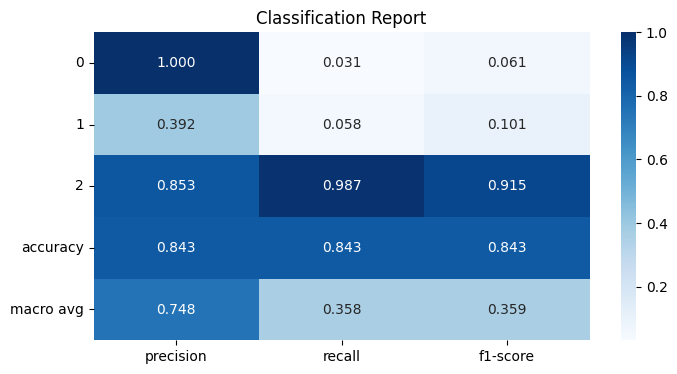

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat DataFrame dari classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).T

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".3f")
plt.title("Classification Report")
plt.show()


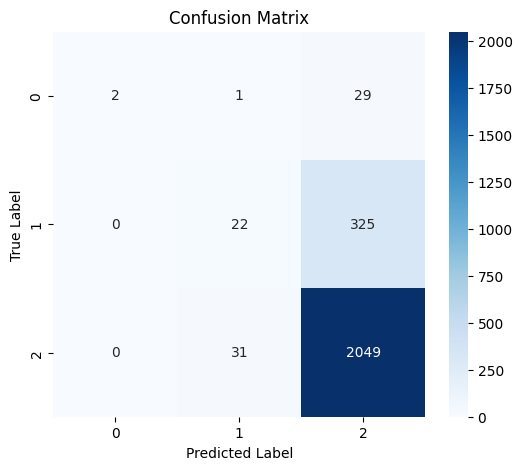

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat heatmap confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Prediksi pada test set
y_pred = final_model.predict(X_test_selected)

# Tampilkan classification report
print(classification_report(y_test, y_pred, digits=4))


In [ ]:
import numpy as np
import pandas as pd
import optuna
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

# Hapus duplikasi sebelum split
df_mix = df_mix.drop_duplicates()

# Pisahkan fitur dan target
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# **Step 1: Split Data (Test Set Tidak Diubah)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **Step 2: Resampling Pipeline**
resampling_pipeline = Pipeline([
    ("tomek", TomekLinks()),  # Mengurangi Slight Injury
    ("smote", SMOTE(sampling_strategy={1: 5000, 0: 800}, random_state=42))  # Oversampling Serious & Fatal Injury
])

X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)

# **Step 3: Hyperparameter Tuning dengan Optuna**
def objective(trial):
    # Hyperparameter yang akan diuji oleh Optuna
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "scale_pos_weight": trial.suggest_uniform("scale_pos_weight", 1.0, 10.0)
    }
    
    # Model XGBoost
    model = XGBClassifier(**params, objective="multi:softprob", num_class=3, eval_metric="mlogloss", random_state=42)

    # Stratified K-Fold Cross Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    losses = []
    
    for train_idx, val_idx in skf.split(X_train_resampled, y_train_resampled):
        X_train_fold, X_val_fold = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
        y_train_fold, y_val_fold = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]
        
        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False, early_stopping_rounds=20)
        y_val_pred = model.predict_proba(X_val_fold)
        loss = log_loss(y_val_fold, y_val_pred)
        losses.append(loss)
    
    return np.mean(losses)

# Jalankan Optuna untuk mencari hyperparameter terbaik
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  # Bisa ditambah trial jika perlu

# Ambil hyperparameter terbaik
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# **Step 4: Train Model dengan Best Hyperparameters**
best_model = XGBClassifier(**best_params, objective="multi:softprob", num_class=3, eval_metric="mlogloss", random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# **Step 5: Evaluasi dengan Loss dan Validation Loss**
y_train_proba = best_model.predict_proba(X_train_resampled)
y_test_proba = best_model.predict_proba(X_test)

train_loss = log_loss(y_train_resampled, y_train_proba)
val_loss = log_loss(y_test, y_test_proba)

print(f"Train Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# **Step 6: Plot Loss dan Val Loss**
plt.figure(figsize=(8, 5))
plt.bar(["Train Loss", "Validation Loss"], [train_loss, val_loss], color=["blue", "red"])
plt.ylabel("Log Loss")
plt.title("Train vs Validation Loss")
plt.show()


[I 2025-03-06 04:46:41,914] A new study created in memory with name: no-name-4d0d0cea-9538-4739-b67a-a375d4003e13
[W 2025-03-06 04:46:41,942] Trial 0 failed with parameters: {'n_estimators': 315, 'max_depth': 6, 'learning_rate': 0.04909400525546311, 'subsample': 0.9795026466913092, 'colsample_bytree': 0.9210786062808272, 'gamma': 1.6608061837559127e-08, 'min_child_weight': 2, 'scale_pos_weight': 6.043006122473454} because of the following error: TypeError("XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'").
Traceback (most recent call last):
  File "/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_167020/3329942759.py", line 55, in objective
    model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False, early_stopping_rounds=20)
  File "/home/ahmadnafim/anaconda3/

TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
df_read['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10401
Serious Injury     1737
Fatal injury        158
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

Accident_severity
2    8320
1    1390
0     126
Name: count, dtype: int64

In [ ]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12296 entries, 0 to 12295
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age_band_of_driver                                  12296 non-null  int64  
 1   Driving_experience                                  12296 non-null  int64  
 2   Road_surface_conditions                             12296 non-null  int64  
 3   Light_conditions                                    12296 non-null  int64  
 4   Weather_conditions                                  12296 non-null  int64  
 5   Number_of_vehicles_involved                         12296 non-null  int64  
 6   Number_of_casualties                                12296 non-null  int64  
 7   Casualty_severity                                   12296 non-null  int64  
 8   Accident_severity                                   12296 non-null  int64  


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Hapus duplikasi
df_mix = df_mix.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikasi: {df_mix.shape[0]}")

# Dapatkan jumlah sampel per kelas sebelum balancing
class_counts = df_mix['Accident_severity'].value_counts().sort_index()
print("Jumlah sampel per kelas sebelum balancing:\n", class_counts)

# Pisahkan fitur & label
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# Split data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection dengan SelectKBest
k_best = SelectKBest(score_func=f_classif, k=14)  # Pilih 10 fitur terbaik
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Hitung scale_pos_weight untuk setiap kelas
total_samples = len(y_train)
class_weights = {c: total_samples / (len(class_counts) * class_counts[c]) for c in class_counts.index}

# Latih model XGBoost dengan class weight
model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    scale_pos_weight=[class_weights[c] for c in sorted(class_weights.keys())]  # Sesuai urutan label
)

model.fit(X_train_selected, y_train)

# Prediksi
y_pred = model.predict(X_test_selected)

# Evaluasi model
print(classification_report(y_test, y_pred, digits=4))

# Cek fitur yang dipilih
selected_features = X.columns[k_best.get_support()]
print("Fitur Terpilih:", selected_features)


Jumlah data setelah menghapus duplikasi: 12295
Jumlah sampel per kelas sebelum balancing:
 Accident_severity
0      158
1     1737
2    10400
Name: count, dtype: int64
              precision    recall  f1-score   support

           0     0.4286    0.0938    0.1538        32
           1     0.6389    0.1326    0.2196       347
           2     0.8618    0.9861    0.9197      2080

    accuracy                         0.8540      2459
   macro avg     0.6431    0.4041    0.4310      2459
weighted avg     0.8247    0.8540    0.8110      2459

Fitur Terpilih: Index(['Age_band_of_driver', 'Driving_experience', 'Light_conditions',
       'Weather_conditions', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Type_of_vehicle_Other',
       'Vehicle_driver_relation_Owner', 'Road_surface_type_Gravel roads',
       'Type_of_collision_kfold', 'Types_of_Junction_kfold', 'Day_kfold',
       'Hour_kfold', 'Vehicle_movement_kfold'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import optuna
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils.class_weight import compute_class_weight

# Hapus duplikasi
df_mix = df_mix.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikasi: {df_mix.shape[0]}")

# Dapatkan jumlah sampel per kelas sebelum balancing
class_counts = df_mix['Accident_severity'].value_counts().sort_index()
print("Jumlah sampel per kelas sebelum balancing:\n", class_counts)

# Pisahkan fitur & label
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

# Hitung class weights
class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(y), 
                                     y=y)
class_weights = dict(zip(np.unique(y), class_weights))

# Split data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection dengan SelectKBest
k_best = SelectKBest(score_func=f_classif, k=14)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Konversi ke DMatrix
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)

# Latih model dengan Optuna
def objective(trial):
    param = {
        "objective": "multi:softmax",
        "num_class": len(np.unique(y)),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "scale_pos_weight": sum(class_weights.values()) / len(class_weights),
        "eta": trial.suggest_float("eta", 0.01, 0.3),
        "eval_metric": "mlogloss"
    }
    
    # Lakukan cross-validation
    cv_results = xgb.cv(
        param, 
        dtrain, 
        num_boost_round=300, 
        nfold=5, 
        metrics='mlogloss', 
        early_stopping_rounds=10
    )
    
    # Ambil skor terbaik (minimum loss)
    best_loss = cv_results['test-mlogloss-mean'].min()
    return -best_loss  # Optuna minimizes, so we return negative loss

# Jalankan Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Ambil hyperparameter terbaik
best_params = study.best_params
print("\n🔹 Best Hyperparameters:", best_params)

# Sesuaikan parameter untuk final model
final_params = {
    **best_params,
    "objective": "multi:softmax",
    "num_class": len(np.unique(y)),
    "scale_pos_weight": sum(class_weights.values()) / len(class_weights),
    "eval_metric": "mlogloss"
}

# Latih model final
num_round = 100  # Atau sesuaikan dengan early stopping
final_model = xgb.train(
    final_params, 
    dtrain, 
    num_boost_round=num_round,
    evals=[(dtest, 'eval')],
    early_stopping_rounds=10
)

# Prediksi
y_pred = final_model.predict(dtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluasi model
print(classification_report(y_test, y_pred_classes, digits=4))

# Cek fitur yang dipilih
selected_features = X.columns[k_best.get_support()]
print("Fitur Terpilih:", selected_features)

# Plot fitur importance
xgb.plot_importance(final_model)
plt.title("Fitur Importance")
plt.tight_layout()
plt.show()

[I 2025-03-06 02:15:23,693] A new study created in memory with name: no-name-8c868f17-fc56-45af-99d3-a7082ad97de5


Jumlah data setelah menghapus duplikasi: 12295
Jumlah sampel per kelas sebelum balancing:
 Accident_severity
0      158
1     1737
2    10400
Name: count, dtype: int64


[I 2025-03-06 02:15:44,521] Trial 0 finished with value: -0.44729819509212965 and parameters: {'learning_rate': 0.08432953649511832, 'max_depth': 6, 'min_child_weight': 4, 'gamma': 3.5627857785677404, 'subsample': 0.6360370217546348, 'colsample_bytree': 0.6225177019921848, 'n_estimators': 203, 'eta': 0.16273837630642415}. Best is trial 0 with value: -0.44729819509212965.
[I 2025-03-06 02:16:10,061] Trial 1 finished with value: -0.43996389645227074 and parameters: {'learning_rate': 0.08772299943220731, 'max_depth': 12, 'min_child_weight': 7, 'gamma': 1.0248328061248124, 'subsample': 0.7197353688685535, 'colsample_bytree': 0.6073974340627086, 'n_estimators': 240, 'eta': 0.16029370373557833}. Best is trial 0 with value: -0.44729819509212965.
[I 2025-03-06 02:16:16,295] Trial 2 finished with value: -0.4442737955994517 and parameters: {'learning_rate': 0.25461171772541347, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 2.970452477085421, 'subsample': 0.5566720699086998, 'colsample_bytree'

KeyboardInterrupt: 

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE, BorderlineSMOTE
# from imblearn.under_sampling import TomekLinks, NearMiss
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import classification_report, accuracy_score

# def run_model_cv(oversampler, undersampler, model_name):
#     pipeline = Pipeline([
#         ("oversampling", oversampler),
#         ("undersampling", undersampler),
#         ("classifier", XGBClassifier(
#             objective="multi:softprob", 
#             eval_metric="mlogloss", 
#             random_state=42
#         ))
#     ])
    
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     accuracy_scores = cross_val_score(pipeline, X_train_pca, y_train, cv=cv, scoring="accuracy")

#     pipeline.fit(X_train_pca, y_train)
#     y_pred = pipeline.predict(X_test_pca)
#     report = classification_report(y_test, y_pred, output_dict=True)

#     results.append({
#         "Model": model_name,
#         "CV Accuracy Mean": np.mean(accuracy_scores),
#         "CV Accuracy Std": np.std(accuracy_scores),
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision_0": report["0"]["precision"],
#         "Recall_0": report["0"]["recall"],
#         "F1_0": report["0"]["f1-score"],
#         "Precision_1": report["1"]["precision"],
#         "Recall_1": report["1"]["recall"],
#         "F1_1": report["1"]["f1-score"],
#         "Precision_2": report["2"]["precision"],
#         "Recall_2": report["2"]["recall"],
#         "F1_2": report["2"]["f1-score"]
#     })

# X_train, X_test, y_train, y_test = train_test_split(
#     X[selected_features_las], y, stratify=y, test_size=0.2, random_state=42
# )

# train_data = X_train.copy()
# train_data["target"] = y_train
# train_data = train_data.drop_duplicates()

# X_train = train_data.drop(columns=["target"])
# y_train = train_data["target"]

# counter = Counter(y_train)
# print("\nDistribusi kelas setelah menghapus duplikat:")
# for k, v in counter.items():
#     print(f"  Kelas {k}: {v} sampel")

# results = []

# smote_strategy = {class_label: int(count * 1.5) for class_label, count in counter.items()}
# run_model_cv(SMOTE(sampling_strategy=smote_strategy, random_state=42), TomekLinks(), "SMOTE + Tomek Links")
# run_model_cv(SMOTE(sampling_strategy=smote_strategy, random_state=42), NearMiss(version=2), "SMOTE + NearMiss")
# run_model_cv(BorderlineSMOTE(sampling_strategy=smote_strategy, random_state=42), TomekLinks(), "Borderline-SMOTE + Tomek Links")
# run_model_cv(BorderlineSMOTE(sampling_strategy=smote_strategy, random_state=42), NearMiss(version=2), "Borderline-SMOTE + NearMiss")

# df_results = pd.DataFrame(results)

# print("\nHasil Evaluasi Model:")
# print(df_results.to_string(index=False))

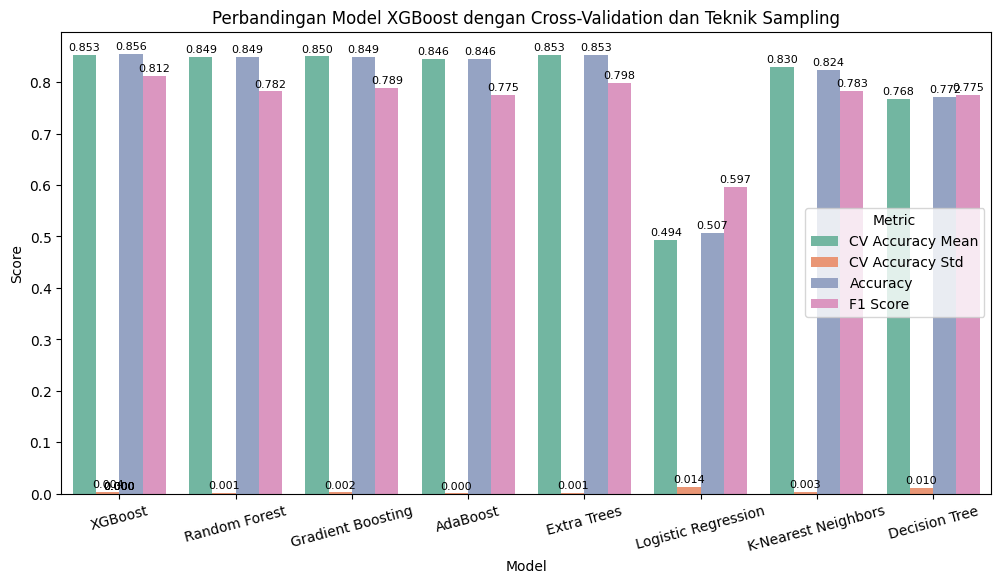

In [ ]:
plt.figure(figsize=(12, 6))
df_melted = df_results.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

ax = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")
plt.xticks(rotation=15)
plt.title("Perbandingan Model XGBoost dengan Cross-Validation dan Teknik Sampling")
plt.ylabel("Score")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.005),  
                ha='center', va='bottom', fontsize=8, color='black')

plt.show()


In [ ]:
# from collections import Counter
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks
# from sklearn.model_selection import train_test_split
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report

# X_train, X_test, y_train, y_test = train_test_split(
#     X[selected_features_lasso], y, stratify=y, test_size=0.2, random_state=42
# )

# # Hapus data duplikat
# train_data = X_train.copy()
# train_data["target"] = y_train
# train_data = train_data.drop_duplicates()

# X_train = train_data.drop(columns=["target"])
# y_train = train_data["target"]

# counter = Counter(y_train)
# print("Distribusi kelas sebelum SMOTE:", counter)

# smote_strategy = {class_label: int(count * 2.0) for class_label, count in counter.items()}

# max_class_count = max(counter.values())
# scale_pos_weight = {cls: max_class_count / count for cls, count in counter.items()}

# pipeline = Pipeline([
#     ("oversampling", SMOTE(sampling_strategy=smote_strategy, random_state=42)),  
#     ("undersampling", TomekLinks(sampling_strategy="auto")),  
#     ("classifier", XGBClassifier(
#         scale_pos_weight=list(scale_pos_weight.values()), 
#         eval_metric="mlogloss", 
#         use_label_encoder=False
#     ))
# ])

# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_test)

# print(classification_report(y_test, y_pred))


In [ ]:
# import optuna
# from collections import Counter
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.metrics import log_loss, classification_report
# import numpy as np


# X_train, X_test, y_train, y_test = train_test_split(
#     X[selected_features_lasso], y, stratify=y, test_size=0.2, random_state=42
# )

# train_data = X_train.copy()
# train_data["target"] = y_train  
# train_data = train_data.drop_duplicates()  


# X_train = train_data.drop(columns=["target"])
# y_train = train_data["target"]


# counter = Counter(y_train)
# print("Distribusi kelas sebelum SMOTE:", counter)


# smote_strategy = {class_label: int(count * 1.5) for class_label, count in counter.items()}

# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 100, 500),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
#         "gamma": trial.suggest_loguniform("gamma", 0.01, 1),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),
#         "scale_pos_weight": 10,  # Sudah kita set sebelumnya
#         "eval_metric": "mlogloss",
#         "use_label_encoder": False
#     }

#     pipeline = Pipeline([
#         ("oversampling", SMOTE(sampling_strategy=smote_strategy, random_state=42)),  
#         ("undersampling", TomekLinks(sampling_strategy="auto")),  
#         ("classifier", XGBClassifier(**params))
#     ])

#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring="neg_log_loss")
    
#     return -np.mean(scores)  

# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=50)


# best_params = study.best_params
# print("\nBest Hyperparameters:", best_params)

# pipeline = Pipeline([
#     ("oversampling", SMOTE(sampling_strategy=smote_strategy, random_state=42)),  
#     ("undersampling", TomekLinks(sampling_strategy="auto")),  
#     ("classifier", XGBClassifier(**best_params, eval_metric="mlogloss", use_label_encoder=False))
# ])

# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_test)

# print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Batas 

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import pandas as pd

# Fungsi untuk menjalankan model dan menyimpan hasil
def evaluate_feature_selection(X_train, X_test, y_train, y_test, method_name):
    results = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model, name in models:
        accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")

        results.append({
            "Feature Selection": method_name,
            "Model": name,
            "CV Accuracy Mean": np.mean(accuracy_scores),
            "CV Accuracy Std": np.std(accuracy_scores),
            "Accuracy": accuracy,
            "F1 Score": f1
        })

    return results

X_train_base, X_test_base, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature Selection 1: Lasso (L1 Regularization)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_base, y_train)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_train_base.columns[model.get_support()]

X_train_lasso = X_train_base[selected_features_lasso]
X_test_lasso = X_test_base[selected_features_lasso]

# Feature Selection 2: PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_base)
X_test_pca = pca.transform(X_test_base)

# Feature Selection 3: Random Forest Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_base, y_train)
importance = rf.feature_importances_
selected_features_rf = X_train_base.columns[importance > np.percentile(importance, 75)]  # Ambil fitur dengan 25% tertinggi

X_train_rf = X_train_base[selected_features_rf]
X_test_rf = X_test_base[selected_features_rf]

# Feature Selection 4: Wrapper Method (RFE dengan Decision Tree)
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=10)
rfe.fit(X_train_base, y_train)
selected_features_rfe = X_train_base.columns[rfe.support_]

X_train_rfe = X_train_base[selected_features_rfe]
X_test_rfe = X_test_base[selected_features_rfe]

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Definisi model yang digunakan untuk evaluasi
models = [
    (XGBClassifier(objective="multi:softprob", eval_metric="mlogloss", random_state=42), "XGBoost"),
    (RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (ExtraTreesClassifier(n_estimators=200, random_state=42), "Extra Trees"),
    (LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(class_weight='balanced', random_state=42), "Decision Tree")
]

# Menjalankan ulang evaluasi untuk setiap metode feature selection
results = []
results.extend(evaluate_feature_selection(X_train_base, X_test_base, y_train, y_test, "Baseline (No Selection)"))
results.extend(evaluate_feature_selection(X_train_lasso, X_test_lasso, y_train, y_test, "Lasso"))
results.extend(evaluate_feature_selection(X_train_pca, X_test_pca, y_train, y_test, "PCA"))
results.extend(evaluate_feature_selection(X_train_rf, X_test_rf, y_train, y_test, "Random Forest Importance"))
results.extend(evaluate_feature_selection(X_train_rfe, X_test_rfe, y_train, y_test, "RFE"))

# Konversi hasil ke DataFrame
df_results = pd.DataFrame(results)
df_results


,Feature Selection,Model,CV Accuracy Mean,CV Accuracy Std,Accuracy,F1 Score
0,Baseline (No Selection),XGBoost,0.846482,0.003362,0.850000,0.806575
1,Baseline (No Selection),Random Forest,0.848109,0.000735,0.847561,0.779980
2,Baseline (No Selection),Gradient Boosting,0.849431,0.002303,0.846341,0.786380
3,Baseline (No Selection),AdaBoost,0.845872,0.000172,0.845935,0.775332
4,Baseline (No Selection),Extra Trees,0.848211,0.001283,0.847154,0.779767
5,Baseline (No Selection),Logistic Regression,0.483223,0.015245,0.467480,0.561720
6,Baseline (No Selection),K-Nearest Neighbors,0.829708,0.004334,0.823984,0.770856
7,Baseline (No Selection),Decision Tree,0.762404,0.002956,0.778049,0.778242
8,Lasso,XGBoost,0.849431,0.003746,0.851626,0.811229
9,Lasso,Random Forest,0.841196,0.004038,0.838211,0.789775


In [ ]:
df_results.to_csv('../model/score/labelslection.csv', index=False)


Distribusi kelas sebelum menangani imbalance:
  Kelas 2: 8320 sampel
  Kelas 1: 1390 sampel
  Kelas 0: 126 sampel

📌 Classification Report untuk XGBoost:
              precision    recall  f1-score   support

           0       0.75      0.09      0.17        32
           1       0.59      0.10      0.16       347
           2       0.86      0.99      0.92      2081

    accuracy                           0.85      2460
   macro avg       0.73      0.39      0.42      2460
weighted avg       0.82      0.85      0.80      2460



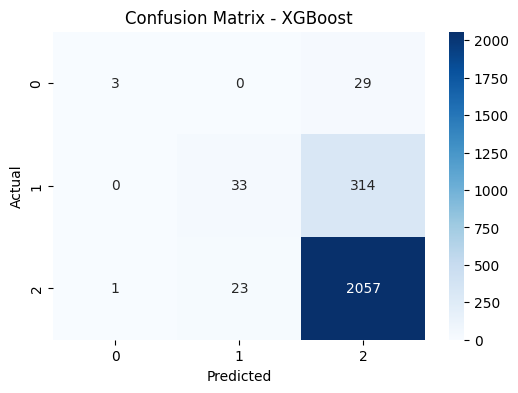


📌 Classification Report untuk Random Forest:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       1.00      0.01      0.02       347
           2       0.85      1.00      0.92      2081

    accuracy                           0.85      2460
   macro avg       0.62      0.34      0.31      2460
weighted avg       0.86      0.85      0.78      2460



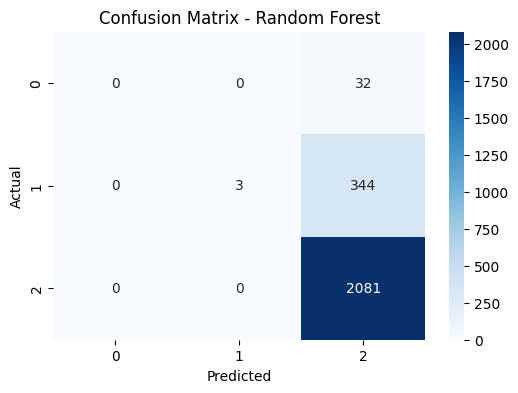


📌 Classification Report untuk Gradient Boosting:
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        32
           1       0.59      0.04      0.07       347
           2       0.85      1.00      0.92      2081

    accuracy                           0.85      2460
   macro avg       0.70      0.37      0.37      2460
weighted avg       0.81      0.85      0.79      2460



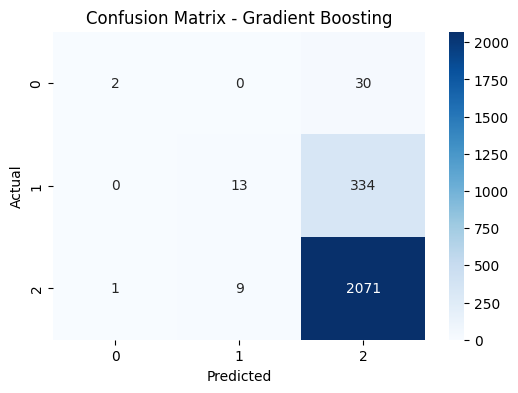


📌 Classification Report untuk AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00       347
           2       0.85      1.00      0.92      2081

    accuracy                           0.85      2460
   macro avg       0.28      0.33      0.31      2460
weighted avg       0.72      0.85      0.78      2460



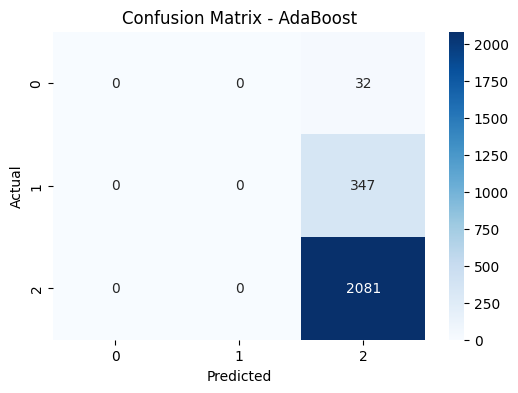

KeyboardInterrupt: 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_train.columns[model.get_support()].tolist()

X_train = X_train[selected_features_lasso]
X_test = X_test[selected_features_lasso]

counter = Counter(y_train)
print("\nDistribusi kelas sebelum menangani imbalance:")
for k, v in counter.items():
    print(f"  Kelas {k}: {v} sampel")

results = []

def run_model_cv(model, model_name):

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\nClassification Report untuk {model_name}:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    results.append({
        "Model": model_name,
        "CV Accuracy Mean": np.mean(accuracy_scores),
        "CV Accuracy Std": np.std(accuracy_scores),
        "Accuracy": accuracy,
        "F1 Score": f1
    })

class_counts = Counter(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]  

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y
)

models = [
    (XGBClassifier(objective="multi:softprob", eval_metric="mlogloss", scale_pos_weight=scale_pos_weight, random_state=42, sample_weight=classes_weights), "XGBoost"),
    (RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (ExtraTreesClassifier(n_estimators=200, random_state=42), "Extra Trees"),
    (LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),  # KNN doesn't support class_weight='balanced'
    (DecisionTreeClassifier(class_weight='balanced', random_state=42), "Decision Tree")
]


for model, name in models:
    run_model_cv(model, name)

df_results = pd.DataFrame(results)

print("\n🔍 Hasil Evaluasi Model:")
print(df_results.to_string(index=False))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
selected_features_lasso = X_train.columns[model.get_support()].tolist()

# y
# train_data = X_train.copy()
# train_data["target"] = y_train
# train_data = train_data.drop_duplicates()

# # X_train = train_data.drop(columns=["target"])
# # y_train = train_data["target"]

# # # SMOTETomek untuk menangani class imbalance
# # smote_tomek = SMOTETomek(random_state=42)
# # X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# # Cek distribusi kelas setelah resampling
# counter = Counter(y_train_resampled)
# print("\nDistribusi kelas setelah SMOTETomek:")
# for k, v in counter.items():
#     print(f"  Kelas {k}: {v} sampel")

results = []

def run_model_cv(model, model_name):
    """Melatih model dengan CV, menghitung akurasi, F1-score, dan Classification Report"""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring="accuracy")

    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n📌 Classification Report untuk {model_name}:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    results.append({
        "Model": model_name,
        "CV Accuracy Mean": np.mean(accuracy_scores),
        "CV Accuracy Std": np.std(accuracy_scores),
        "Accuracy": accuracy,
        "F1 Score": f1
    })

# Daftar model yang akan diuji
models = [
    (XGBClassifier(objective="multi:softprob", eval_metric="mlogloss", random_state=42), "XGBoost"),
    (RandomForestClassifier(n_estimators=200, random_state=42), "Random Forest"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (AdaBoostClassifier(n_estimators=100, random_state=42), "AdaBoost"),
    (ExtraTreesClassifier(n_estimators=200, random_state=42), "Extra Trees"),
    (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree")
]

# Jalankan model dan tampilkan hasil evaluasi
for model, name in models:
    run_model_cv(model, name)

df_results = pd.DataFrame(results)

print("\n🔍 Hasil Evaluasi Model:")
print(df_results.to_string(index=False))



Jumlah fitur yang dipilih oleh Lasso: 17
Fitur yang dipilih: ['Vehicle_driver_relation_1', 'Vehicle_driver_relation_3', 'Owner_of_vehicle_1', 'Owner_of_vehicle_2', 'Road_surface_conditions_1', 'Road_surface_conditions_2', 'Light_conditions_1', 'Light_conditions_2', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Day_1', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7']

Distribusi kelas setelah SMOTETomek:
  Kelas 2: 6102 sampel
  Kelas 1: 6100 sampel
  Kelas 0: 6240 sampel


KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.utils import resample

In [ ]:
import optuna
import numpy as np
import warnings
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

smote_tomek = SMOTETomek(tomek=TomekLinks(sampling_strategy="auto"), random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

lasso = LassoCV(cv=5, random_state=42).fit(X_train_resampled, y_train_resampled)
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train_resampled)
X_test_selected = model.transform(X_test)

def optimize(trial, model_name):
    if model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        }
        model = XGBClassifier(**params, objective="multi:softprob", eval_metric="mlogloss", random_state=42, n_jobs=1)
    
    elif model_name == "Random Forest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        }
        model = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    
    elif model_name == "Extra Trees":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        }
        model = ExtraTreesClassifier(**params, random_state=42, n_jobs=-1)
    
    else:
        return 0

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_selected, y_train_resampled, cv=cv, scoring="accuracy", n_jobs=1)
    return np.mean(scores)

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(lambda trial: optimize(trial, "Random Forest"), n_trials=20)

study_et = optuna.create_study(direction="maximize")
study_et.optimize(lambda trial: optimize(trial, "Extra Trees"), n_trials=20)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(lambda trial: optimize(trial, "XGBoost"), n_trials=10)



[I 2025-03-05 08:30:05,569] A new study created in memory with name: no-name-03378bf8-b843-4f31-8919-ac87bfe4c6e7
[I 2025-03-05 08:30:17,238] Trial 0 finished with value: 0.8411787344564864 and parameters: {'n_estimators': 299, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8411787344564864.
[I 2025-03-05 08:30:35,975] Trial 1 finished with value: 0.9231107137417979 and parameters: {'n_estimators': 491, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.9231107137417979.
[I 2025-03-05 08:30:39,413] Trial 2 finished with value: 0.7397789582560336 and parameters: {'n_estimators': 76, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9231107137417979.
[I 2025-03-05 08:30:58,228] Trial 3 finished with value: 0.9243035371030365 and parameters: {'n_estimators': 453, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 3 with value: 

In [ ]:
print(study_xgb.best_value)
print(study_rf.best_value)
print(study_et.best_value)

print(f"Jumlah fitur sebelum seleksi: {X_train.shape[1]}")
print(f"Jumlah fitur setelah seleksi Lasso: {X_train_selected.shape[1]}")

0.9493548122488796
0.9390525358558511
0.8838520776724377
Jumlah fitur sebelum seleksi: 45
Jumlah fitur setelah seleksi Lasso: 41


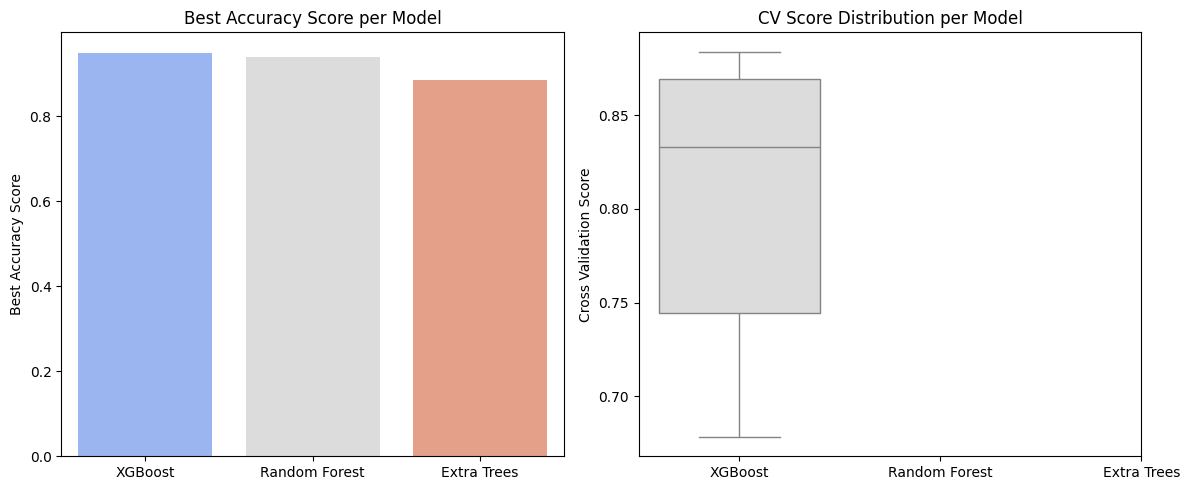

Jumlah fitur sebelum seleksi: 45
Jumlah fitur setelah seleksi Lasso: 41


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

xgb_score = study_xgb.best_value
rf_score = study_rf.best_value
et_score = study_et.best_value

xgb_scores = study_xgb.trials_dataframe()["value"]
rf_scores = study_rf.trials_dataframe()["value"]
et_scores = study_et.trials_dataframe()["value"]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=["XGBoost", "Random Forest", "Extra Trees"], 
            y=[xgb_score, rf_score, et_score], 
            palette="coolwarm")
plt.ylabel("Best Accuracy Score")
plt.title("Best Accuracy Score per Model")

plt.subplot(1, 2, 2)
sns.boxplot(data=[xgb_scores, rf_scores, et_scores], 
            palette="coolwarm")
plt.xticks(ticks=[0, 1, 2], labels=["XGBoost", "Random Forest", "Extra Trees"])
plt.ylabel("Cross Validation Score")
plt.title("CV Score Distribution per Model")

plt.tight_layout()
plt.show()

print(f"Jumlah fitur sebelum seleksi: {X_train.shape[1]}")
print(f"Jumlah fitur setelah seleksi Lasso: {X_train_selected.shape[1]}")


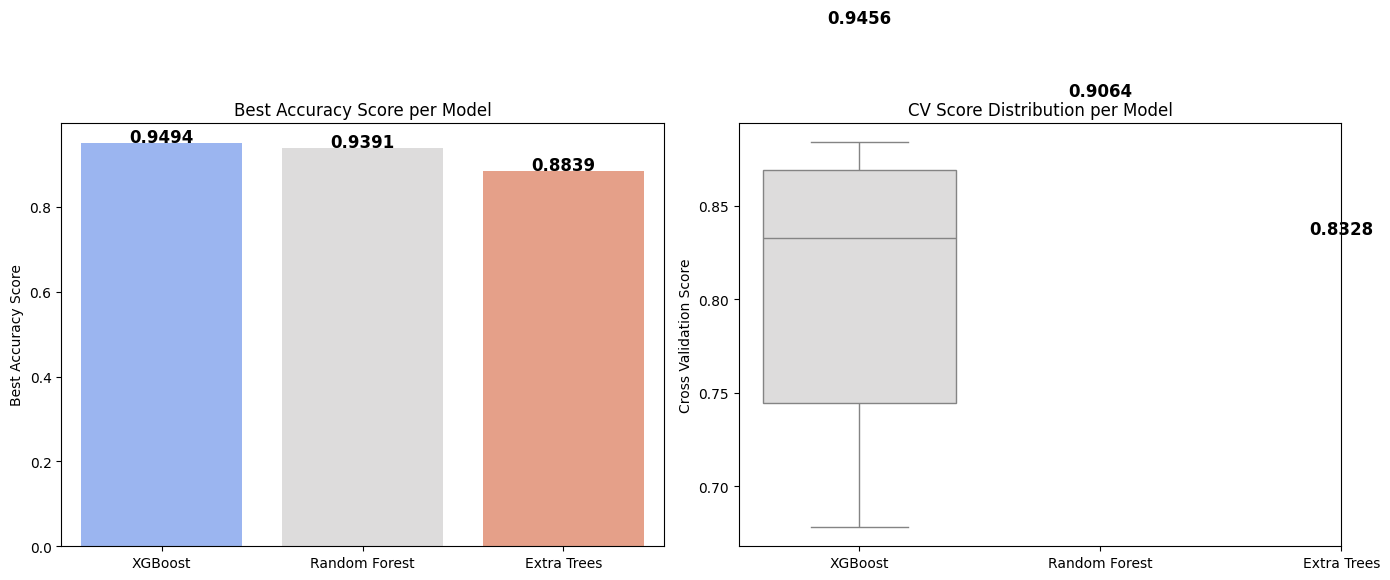

Jumlah fitur sebelum seleksi: 45
Jumlah fitur setelah seleksi Lasso: 41


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan semua study sudah dijalankan
if study_xgb.best_trial and study_rf.best_trial and study_et.best_trial:
    xgb_score = study_xgb.best_value
    rf_score = study_rf.best_value
    et_score = study_et.best_value

    xgb_scores = study_xgb.trials_dataframe()["value"].dropna()
    rf_scores = study_rf.trials_dataframe()["value"].dropna()
    et_scores = study_et.trials_dataframe()["value"].dropna()

    plt.figure(figsize=(14, 6))

    # Plot Bar Chart
    plt.subplot(1, 2, 1)
    ax = sns.barplot(x=["XGBoost", "Random Forest", "Extra Trees"], 
                     y=[xgb_score, rf_score, et_score], 
                     palette="coolwarm")

    # Tambahkan angka di atas bar
    for i, score in enumerate([xgb_score, rf_score, et_score]):
        ax.text(i, score + 0.002, f"{score:.4f}", ha="center", fontsize=12, fontweight="bold")

    plt.ylabel("Best Accuracy Score")
    plt.title("Best Accuracy Score per Model")

    # Plot Boxplot
    plt.subplot(1, 2, 2)
    ax = sns.boxplot(data=[xgb_scores, rf_scores, et_scores], 
                     palette="coolwarm")

    plt.xticks(ticks=[0, 1, 2], labels=["XGBoost", "Random Forest", "Extra Trees"])
    plt.ylabel("Cross Validation Score")
    plt.title("CV Score Distribution per Model")

    # Tambahkan angka median pada Boxplot
    for i, scores in enumerate([xgb_scores, rf_scores, et_scores]):
        median = scores.median()
        ax.text(i, median + 0.002, f"{median:.4f}", ha="center", fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.show()

    # Tampilkan jumlah fitur sebelum dan sesudah seleksi
    print(f"Jumlah fitur sebelum seleksi: {X_train.shape[1]}")
    print(f"Jumlah fitur setelah seleksi Lasso: {X_train_selected.shape[1]}")

else:
    print("Pastikan semua model sudah dioptimasi sebelum menampilkan grafik.")


In [ ]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # 1️⃣ Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # 2️⃣ Oversampling dengan SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # 3️⃣ Random Forest Model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# # 4️⃣ XGBoost Model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train, sample_weight=[1 if i == 2 else 3 for i in y_train])  # Atur bobot lebih tinggi untuk kelas minoritas
# xgb_pred = xgb_model.predict(X_test)

# # 5️⃣ Evaluasi Model
# rf_report = classification_report(y_test, rf_pred, digits=6)
# xgb_report = classification_report(y_test, xgb_pred, digits=6)

# # 6️⃣ Tampilkan hasil evaluasi
# print("===== Evaluasi Model Random Forest =====")
# print(rf_report)

# print("\n===== Evaluasi Model XGBoost =====")
# print(xgb_report)
rf_scores

0     0.841179
1     0.923111
2     0.739779
3     0.924304
4     0.909121
5     0.754745
6     0.934010
7     0.757565
8     0.753606
9     0.709847
10    0.886835
11    0.926744
12    0.930160
13    0.939053
14    0.903645
15    0.937209
16    0.842047
17    0.937643
18    0.911236
19    0.868291
Name: value, dtype: float64

In [ ]:
et_scores

0     0.702527
1     0.678994
2     0.839768
3     0.750460
4     0.726114
5     0.702635
6     0.753877
7     0.857607
8     0.853053
9     0.678288
10    0.883527
11    0.883744
12    0.883852
13    0.821603
14    0.868832
15    0.817862
16    0.854734
17    0.883310
18    0.870134
19    0.825832
Name: value, dtype: float64

0    0.948270
1    0.946102
2    0.949355
3    0.948433
4    0.948813
5    0.920562
6    0.937805
7    0.940299
8    0.923653
9    0.945071
Name: value, dtype: float64

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from imblearn.combine import SMOTETomek
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# # Split data dengan stratifikasi
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # SMOTE-Tomek untuk menangani ketidakseimbangan kelas
# smote_tomek = SMOTETomek(random_state=42)
# X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# # Model Random Forest
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

# # 4️⃣ XGBoost Model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# xgb_model.fit(X_train, y_train, sample_weight=[1 if i == 2 else 3 for i in y_train])  # Atur bobot lebih tinggi untuk kelas minoritas
# xgb_pred = xgb_model.predict(X_test)


# # Evaluasi performa model untuk setiap kelas
# rf_report = classification_report(y_test, rf_pred, output_dict=True)
# xgb_report = classification_report(y_test, xgb_pred, output_dict=True)

# # Konversi ke DataFrame agar lebih rapi
# df_rf = pd.DataFrame(rf_report).T
# df_xgb = pd.DataFrame(xgb_report).T

# # Menampilkan hasil evaluasi
# print("\n===== Evaluasi Model Random Forest =====")
# print(df_rf)

# print("\n===== Evaluasi Model XGBoost =====")
# print(df_xgb)

# # Cross Validation untuk masing-masing model
# rf_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
# xgb_cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# # Menampilkan skor cross-validation
# print("\nCross-Validation Accuracy Scores:")
# print(f"Random Forest: {rf_cv_scores.mean():.4f}")
# print(f"XGBoost      : {xgb_cv_scores.mean():.4f}")


In [ ]:

# # Split data dengan stratifikasi
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Menentukan sampling_strategy untuk ADASYN pada multi-class
# sampling_strategy = "auto"  # Bisa juga pakai dict, contoh: {0: 500, 1: 1000, 2: 2000}

# # ADASYN + Tomek Links Pipeline
# pipeline = make_pipeline(
#     ADASYN(sampling_strategy=sampling_strategy, random_state=42),
#     TomekLinks(sampling_strategy='auto')
# )
# X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# # Model Random Forest dengan class_weight='balanced'
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# rf_model.fit(X_resampled, y_resampled)
# rf_pred = rf_model.predict(X_test)

# # Hitung scale_pos_weight untuk XGBoost
# unique_classes, class_counts = np.unique(y_train, return_counts=True)
# scale_pos_weight = {cls: max(class_counts) / count for cls, count in zip(unique_classes, class_counts)}

# # Model XGBoost dengan scale_pos_weight
# xgb_model = XGBClassifier(
#     random_state=42,
#     scale_pos_weight=[scale_pos_weight.get(cls, 1) for cls in y_train]  # Default 1 jika kelas tidak ada
# )
# xgb_model.fit(X_resampled, y_resampled)
# xgb_pred = xgb_model.predict(X_test)

# # Evaluasi model
# rf_report = classification_report(y_test, rf_pred, output_dict=True)
# xgb_report = classification_report(y_test, xgb_pred, output_dict=True)

# # Konversi ke DataFrame
# df_rf = pd.DataFrame(rf_report).T
# df_xgb = pd.DataFrame(xgb_report).T

# # Menampilkan hasil evaluasi
# print("\n===== Evaluasi Model Random Forest =====")
# print(df_rf)

# print("\n===== Evaluasi Model XGBoost =====")
# print(df_xgb)

# # Cross Validation pada data resampled
# rf_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
# xgb_cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

# # Menampilkan skor cross-validation
# print("\nCross-Validation Accuracy Scores:")
# print(f"Random Forest: {rf_cv_scores.mean():.4f}")
# print(f"XGBoost      : {xgb_cv_scores.mean():.4f}")


In [ ]:
# df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# df_resampled = df_resampled.drop_duplicates()

In [ ]:
# df_resampled['Accident_severity'].value_counts()

In [ ]:
# y_train.value_counts()